# **EXECUTIVE SUMMARY**
The primary aim of this project was to predict whether a customer would buy insurance after getting a quote. This is what we call the 'IS_BOUND' value in our study. In simpler terms, we wanted to know, based on the information we had, if a customer would end up purchasing insurance ('1' means they bought, '0' means they didn't) after asking for the insurance quote. To do this, we looked at a lot of different factors related to the customer and their vehicle, which could possibly help us determine whether or not the customer will buy insurance.

## Data Cleaning and Preprocessing
* **Aligning Columns**: We started by making sure the data was organized in a consistent way across the training and test sets. This meant aligning the column names in the training data (the data our model will learn from) and the test data (the data we test our predictions on), since the column names on the training and test data were slightly different.

* **Understanding the Data Through Visualization**: We used visual tools to understand how the 'IS_BOUND' value was distrubuted in the data. We also identified the features with missing values and visualized their missing percentage using an interactive horizontal bar graph. Then we plotted the distribuion of each missing value and we looked into them one by one to determine the best way to fill in those missing values.

* **Handling Missing Data**: We found ot that some features had a very high percentage of missing data. For example, the number of years someone had been the principal driver of their vehicle had a very high percentage of missing values (99.4%), and since there were no other features that provided any information that could be used to determine this value, we decided to drop this feature. But for other features like the annual distance driven (ANNUAL_KM) and the value of the vehicle (VEHICLE_VALUE), we filled in the missing data using other suitable imputation methods which are explained in the respective sections.

## Feature Engineering
* **Creating New Features**: We created some new features to better capture important information. This included defining things like the type of vehicle and its bodystyle, etc. We figured these out using the existing data about the vehicle's make and model.

* **Splitting Features for Convenience**: We also split some existing features, like the date when the insurance was quoted and the postal code, into smaller parts. This made it easier to use them without losing any important information.

## Feature Selection
For selecting the most useful features, we used a technique called Lasso Selection. This method helps in picking out the most relevant/important features for our study, eliminating the less important ones.

## Model Selection and Training
### **Choosing the Models**
 We decided to use two different statistical models for making predictions: Logistic Regression and a combination of Principal Component Analysis (PCA) with Linear Discriminant Analysis (LDA), which was passed through a sigmoid function (a function that converts numerical inputs into probabilities). \\

  **Logistic Regression** is a statistical method that predicts the likelihood of an event (like buying insurance) by considering multiple factors, such as their age and car type. Logistic Regression takes these factors and applies the logistic function to them which calculates the probability of an event occurring (like buying insurance) given specific input data (age, car type, etc.). The output is a probability value between 0 and 1. If the value is close to 1, it means there's a high chance of the event occurring, and if it's near 0, the chance is low. Based on these probabilities we can then make the predictions about whether the customer bought the insurance or not.  \\

  **The combination of PCA and LDA** on the other hand is a more layered approach. First, PCA reduces the dimensions in our data and provides the components that capture the most important information. Then, LDA, a Bayesian-based model, evaluates how likely different data points fit into specific categories, looking at trends and variations. Finally, we apply a sigmoid function, similar to Logistic Regression, to convert LDA's findings into probabilities. This allows us to understand our data in terms of likelihood, making it easier to make predictions.

### **Evaluating the Models**
Both models were evaluated on validation set after training. For evaluation purposes, we looked at their accuracy ( how often the model's predictions are correct), precision (the percentage of times our model was right when it predicted something as positive), recall (the percentage of actual positive cases our model correctly predicted) and F1-Score (a balance between precision and recall). \\

To compare the performance of both models, the ROC-AUC curve was utilized. The ROC (Receiver Operating Characteristic) curve is a graph that shows the trade-off between the true positive rate (correctly predicting an event, like buying insurance) and the false positive rate (incorrectly predicting that event) at various threshold settings. The AUC (Area Under the Curve) represents a numerical measure of the model's overall ability to distinguish between different outcomes (such as buying or not buying insurance). A higher AUC indicates a better model performance. Here's how each model performed on the validation sets:

#### Logistic Regression Model :       
* Accuracy on validation set: 51.6488909245567
* Precision : 0.27630708140304433
* Recall : 0.751462426878656
* F1-score : 0.40404855034477194
* AUC on validation set: 0.6012008983633834

#### PCA and LDA Model :         
* Accuracy on validation set : 53.78560351765699
* Precision : 0.2851051290495918
* Recall : 0.7378762729352654
* F1-score : 0.4112925408216849
* AUC on validation set: 0.6552338726353913


## Final Model and Result
After evaluating the models, both models were retrained on full training data and the response variable (IS_BOUND) was predicted on the unseen test data. The results obtained from both models is as follows:

### Logistic Regression Model:
*	Accuracy : 52
*	False Positive Rate : 29
*	False Negative Rate : 51
* Revenue Generated in cents per person : 16


### PCA And LDA Model:
*	Accuracy : 51
*	False Positive Rate : 28
*	False Negative Rate : 52
* Revenue Generated in cents per person : 15


From above results we can see that the performance of both models is somewhat similar with the Logistic Regression with a slight edge over the PCA and LDA model.




#**SETTING UP**

##Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV, KFold,cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score,make_scorer,roc_curve,confusion_matrix
from google.colab import drive

##Mounting Google Drive

In [ ]:
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


## Importing training and test datasets

In [ ]:
##Specifying Filepaths for training and test datasets

#Filepath for training data
train_file_path = '/content/drive/My Drive/Cooperators_Quotes_Dataset_Training.xlsx'

# Sheet name for training data
train_sheet_name = 'Quotes_BI_WORKSHOP2016 (003)'

#Filepath for test data
test_file_path = '/content/drive/My Drive/Cooperators_Quotes_Dataset_Test.xlsx'


In [ ]:
# Loading the specified sheet
data_train = pd.read_excel(train_file_path, sheet_name=train_sheet_name)

data_test = pd.read_excel(test_file_path)

In [ ]:
drive.flush_and_unmount()

#**DATA PRE-PROCESSING**

## First look into the Datasets

Lets start by examining both Datasets

In [ ]:
data_train.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,10.0,No,Married,Trades,0,0,0,0,0,0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0


In [ ]:
data_test.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUALKM,COMMUTEDISTANCE,MARKINGSYSTEM,TRACKINGSYSTEM,VEHICLEOWNERSHIP,VEHICLEVALUE,...,YEARSLICENSED,YEARSASPRINCIPALDRIVER,MULTIPRODUCT,MARITALSTATUS,OCCUPATION,CONVICTIONCOUNTMINOR3YRS,CONVICTIONCOUNTMAJOR3YRS,CONVICTIONCOUNTCRIMINAL3YRS,ASSIGNEDLOSSESPD5YRS,SUSPENSIONCOUNT
0,2017-01-03,2002,HONDA,CIVIC EX 2DR COUPE [U.S. MODEL],10000,4.0,NaN,NaN,NaN,NaN,...,7.0,NaN,No,Single,Not Known,0,0,0,0,0
1,2017-01-04,2010,FORD TRUCK/VAN,F150 XLT SUPERCREW 4WD,10000,10.0,NaN,NaN,NaN,NaN,...,13.0,NaN,Yes,Single,Not Known,0,0,0,0,0
2,2017-01-04,2017,DODGE/RAM TRUCK/VAN,RAM 1500 REBEL CREW CAB 4WD,9000,3.0,NaN,NaN,Owned,72000.0,...,33.0,NaN,Yes,Single,Not Known,0,0,0,0,0
3,2017-01-04,2013,DODGE/RAM TRUCK/VAN,RAM 1500 SPORT CREW CAB 4WD,10000,10.0,NaN,NaN,NaN,55000.0,...,9.0,NaN,No,Single,Not Known,0,0,0,0,0
4,2017-01-04,2014,FORD,FOCUS SE 4DR,20000,10.0,NaN,NaN,NaN,NaN,...,4.0,NaN,No,Single,Student,0,0,0,0,0


From above tables we can see that our training data consists of 26 columns and the test data has 25 columns. The training data has response variable (IS_BOUND) whereas the test data does not.

Also, the Column names in the test dataset are missing underscore (_). Lets map the columns from training data to the test data.

In [ ]:
columns_mapping = {
    'ANNUALKM': 'ANNUAL_KM',
    'COMMUTEDISTANCE': 'COMMUTE_DISTANCE',
    'MARKINGSYSTEM': 'MARKING_SYSTEM',
    'TRACKINGSYSTEM': 'TRACKING_SYSTEM',
    'VEHICLEOWNERSHIP': 'VEHICLE_OWNERSHIP',
    'VEHICLEVALUE': 'VEHICLE_VALUE',
    'YEAROFBIRTH': 'YEAR_OF_BIRTH',
    'POSTALCODE': 'POSTAL_CODE',
    'AREACODE': 'AREA_CODE',
    'YEARSLICENSED': 'YEARS_LICENSED',
    'YEARSASPRINCIPALDRIVER': 'YEARS_AS_PRINCIPAL_DRIVER',
    'MULTIPRODUCT': 'MULTI_PRODUCT',
    'MARITALSTATUS': 'MARITAL_STATUS',
    'CONVICTIONCOUNTMINOR3YRS': 'CONVICTION_COUNT_MINOR_3YRS',
    'CONVICTIONCOUNTMAJOR3YRS': 'CONVICTION_COUNT_MAJOR_3YRS',
    'CONVICTIONCOUNTCRIMINAL3YRS': 'CONVICTION_COUNT_CRIMINAL_3YRS',
    'ASSIGNEDLOSSESPD5YRS': 'ASSIGNED_LOSSES_PD_5YRS',
    'SUSPENSIONCOUNT': 'SUSPENSION_COUNT'
}

# Rename the columns in 'data_test'
data_test.rename(columns=columns_mapping, inplace=True)

In [ ]:
print(data_train.columns)
print(data_test.columns)

Index(['QUOTEDATE', 'VEHICLEYEAR', 'VEHICLEMAKE', 'VEHICLEMODEL', 'ANNUAL_KM',
       'COMMUTE_DISTANCE', 'MARKING_SYSTEM', 'TRACKING_SYSTEM',
       'VEHICLE_OWNERSHIP', 'VEHICLE_VALUE', 'VEHICLEUSE', 'GENDER',
       'YEAR_OF_BIRTH', 'POSTAL_CODE', 'AREA_CODE', 'YEARS_LICENSED',
       'YEARS_AS_PRINCIPAL_DRIVER', 'MULTI_PRODUCT', 'MARITAL_STATUS',
       'OCCUPATION', 'CONVICTION_COUNT_MINOR_3YRS',
       'CONVICTION_COUNT_MAJOR_3YRS', 'CONVICTION_COUNT_CRIMINAL_3YRS',
       'ASSIGNED_LOSSES_PD_5YRS', 'SUSPENSION_COUNT', 'IS_BOUND'],
      dtype='object')
Index(['QUOTEDATE', 'VEHICLEYEAR', 'VEHICLEMAKE', 'VEHICLEMODEL', 'ANNUAL_KM',
       'COMMUTE_DISTANCE', 'MARKING_SYSTEM', 'TRACKING_SYSTEM',
       'VEHICLE_OWNERSHIP', 'VEHICLE_VALUE', 'VEHICLEUSE', 'GENDER',
       'YEAR_OF_BIRTH', 'POSTAL_CODE', 'AREA_CODE', 'YEARS_LICENSED',
       'YEARS_AS_PRINCIPAL_DRIVER', 'MULTI_PRODUCT', 'MARITAL_STATUS',
       'OCCUPATION', 'CONVICTION_COUNT_MINOR_3YRS',
       'CONVICTION_COUNT_MAJO

Now that the column names are fixed, lets check the number of rows and columns in our datasets.

In [ ]:
data_train.shape


(101891, 26)

In [ ]:
data_test.shape

(15114, 25)

## Visualizing the Data

### Response Variable

Since the response variable is IS_BOUND with values '0' and '1', lets check the distribution of these categories

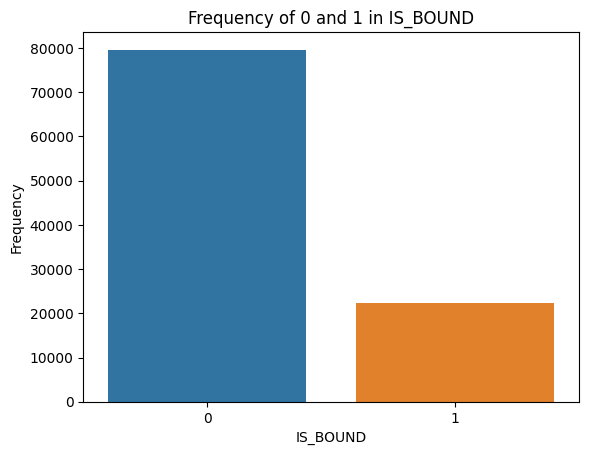

In [ ]:
#Visualizing the response variable
sns.countplot(x='IS_BOUND', data=data_train)

plt.title('Frequency of 0 and 1 in IS_BOUND')
plt.xlabel('IS_BOUND')
plt.ylabel('Frequency')
plt.show()

It is evident from the above count plot that our response variable is imbalanced with almost 80% 0s and only about 20% 1s. Such an imbalance can affect our model and we will tackle this issue before training our model.

### Missing Values

The first step in our data preprocessing is to make sure that our dataset does not have any missing values. We start by extracting the features that have missing values and fill in those missing values using appropriate imputation techniques. Below we have used an interactive plot to visualize which features have missing values.

##### Visualizing Features with Missing Values in Training Data

In [ ]:
# Calculate the count and percentage of missing values for each feature
missing_data = pd.DataFrame({
    'Feature': data_train.columns,
    'MissingCount': data_train.isna().sum(),
    'MissingPercentage': (data_train.isna().sum() / len(data_train)) * 100
})

# Filter out features without missing values and sort
missing_data = missing_data[missing_data['MissingCount'] > 0].sort_values(by='MissingPercentage', ascending=True)

# Create an interactive bar chart
fig = px.bar(missing_data, x='MissingPercentage', y='Feature', orientation='h', text='MissingCount',
             labels={'MissingPercentage': 'Percentage of Missing Values', 'Feature': 'Features'})

# Update layout
fig.update_layout(title='Count of Missing Values by Feature in Training Data',
                  xaxis_title='Percentage of Missing Values', yaxis_title='Features')
fig.update_traces(texttemplate='%{text}', textposition='inside')
for text in fig.data:
    # Adjust text position based on bar length
    text.textposition = ['outside' if percentage < 20 else 'inside' for percentage in text.x]

# Show the plot
fig.show()


##### Visualizing Features with Missing Values in Test Data

In [ ]:
# Calculating the count and percentage of missing values for each feature
missing_data = pd.DataFrame({
    'Feature': data_test.columns,
    'MissingCount': data_test.isna().sum(),
    'MissingPercentage': (data_test.isna().sum() / len(data_test)) * 100
})

# Filtering out and sorting features with missing values
missing_data = missing_data[missing_data['MissingCount'] > 0].sort_values(by='MissingPercentage', ascending=True)

# Creating an interactive bar chart
fig = px.bar(missing_data, x='MissingPercentage', y='Feature', orientation='h', text='MissingCount',
             labels={'MissingPercentage': 'Percentage of Missing Values', 'Feature': 'Features'})

fig.update_layout(title='Count of Missing Values by Feature in Test Data',
                  xaxis_title='Percentage of Missing Values', yaxis_title='Features')
fig.update_traces(texttemplate='%{text}', textposition='inside')
for text in fig.data:
#The features with low missing values werent showing the count, so adjusting text position
    text.textposition = ['outside' if percentage < 20 else 'inside' for percentage in text.x]

# Show the plot
fig.show()


Ten columns in data_train have missing values as seen from the first plot. \\
 "TRACKING_SYSTEM", "MARKING_SYSTEM", "YEARS_AS_PRINCIPAL_DRIVER" ,"VEHICLE_OWNERSHIP", "VEHICLE_VALUE", "COMMUTE_DISTANCE",
"YEARS_LICENSED", "GENDER", "ANNUAL_KM", "OCCUPATION" are the features that have missing values in data_train. Lets visualize this features individually. \\
And 7 columns have missing values in data_test. These columns are common between our training and test data. We will simultaneously fill the missing values in both datasets.

We start by visualizing the distribution of each of these missing features from our training data. This will help us understand what types of features have missing values and also help us understand their distribution which may assist in select an appropriate imputation method.

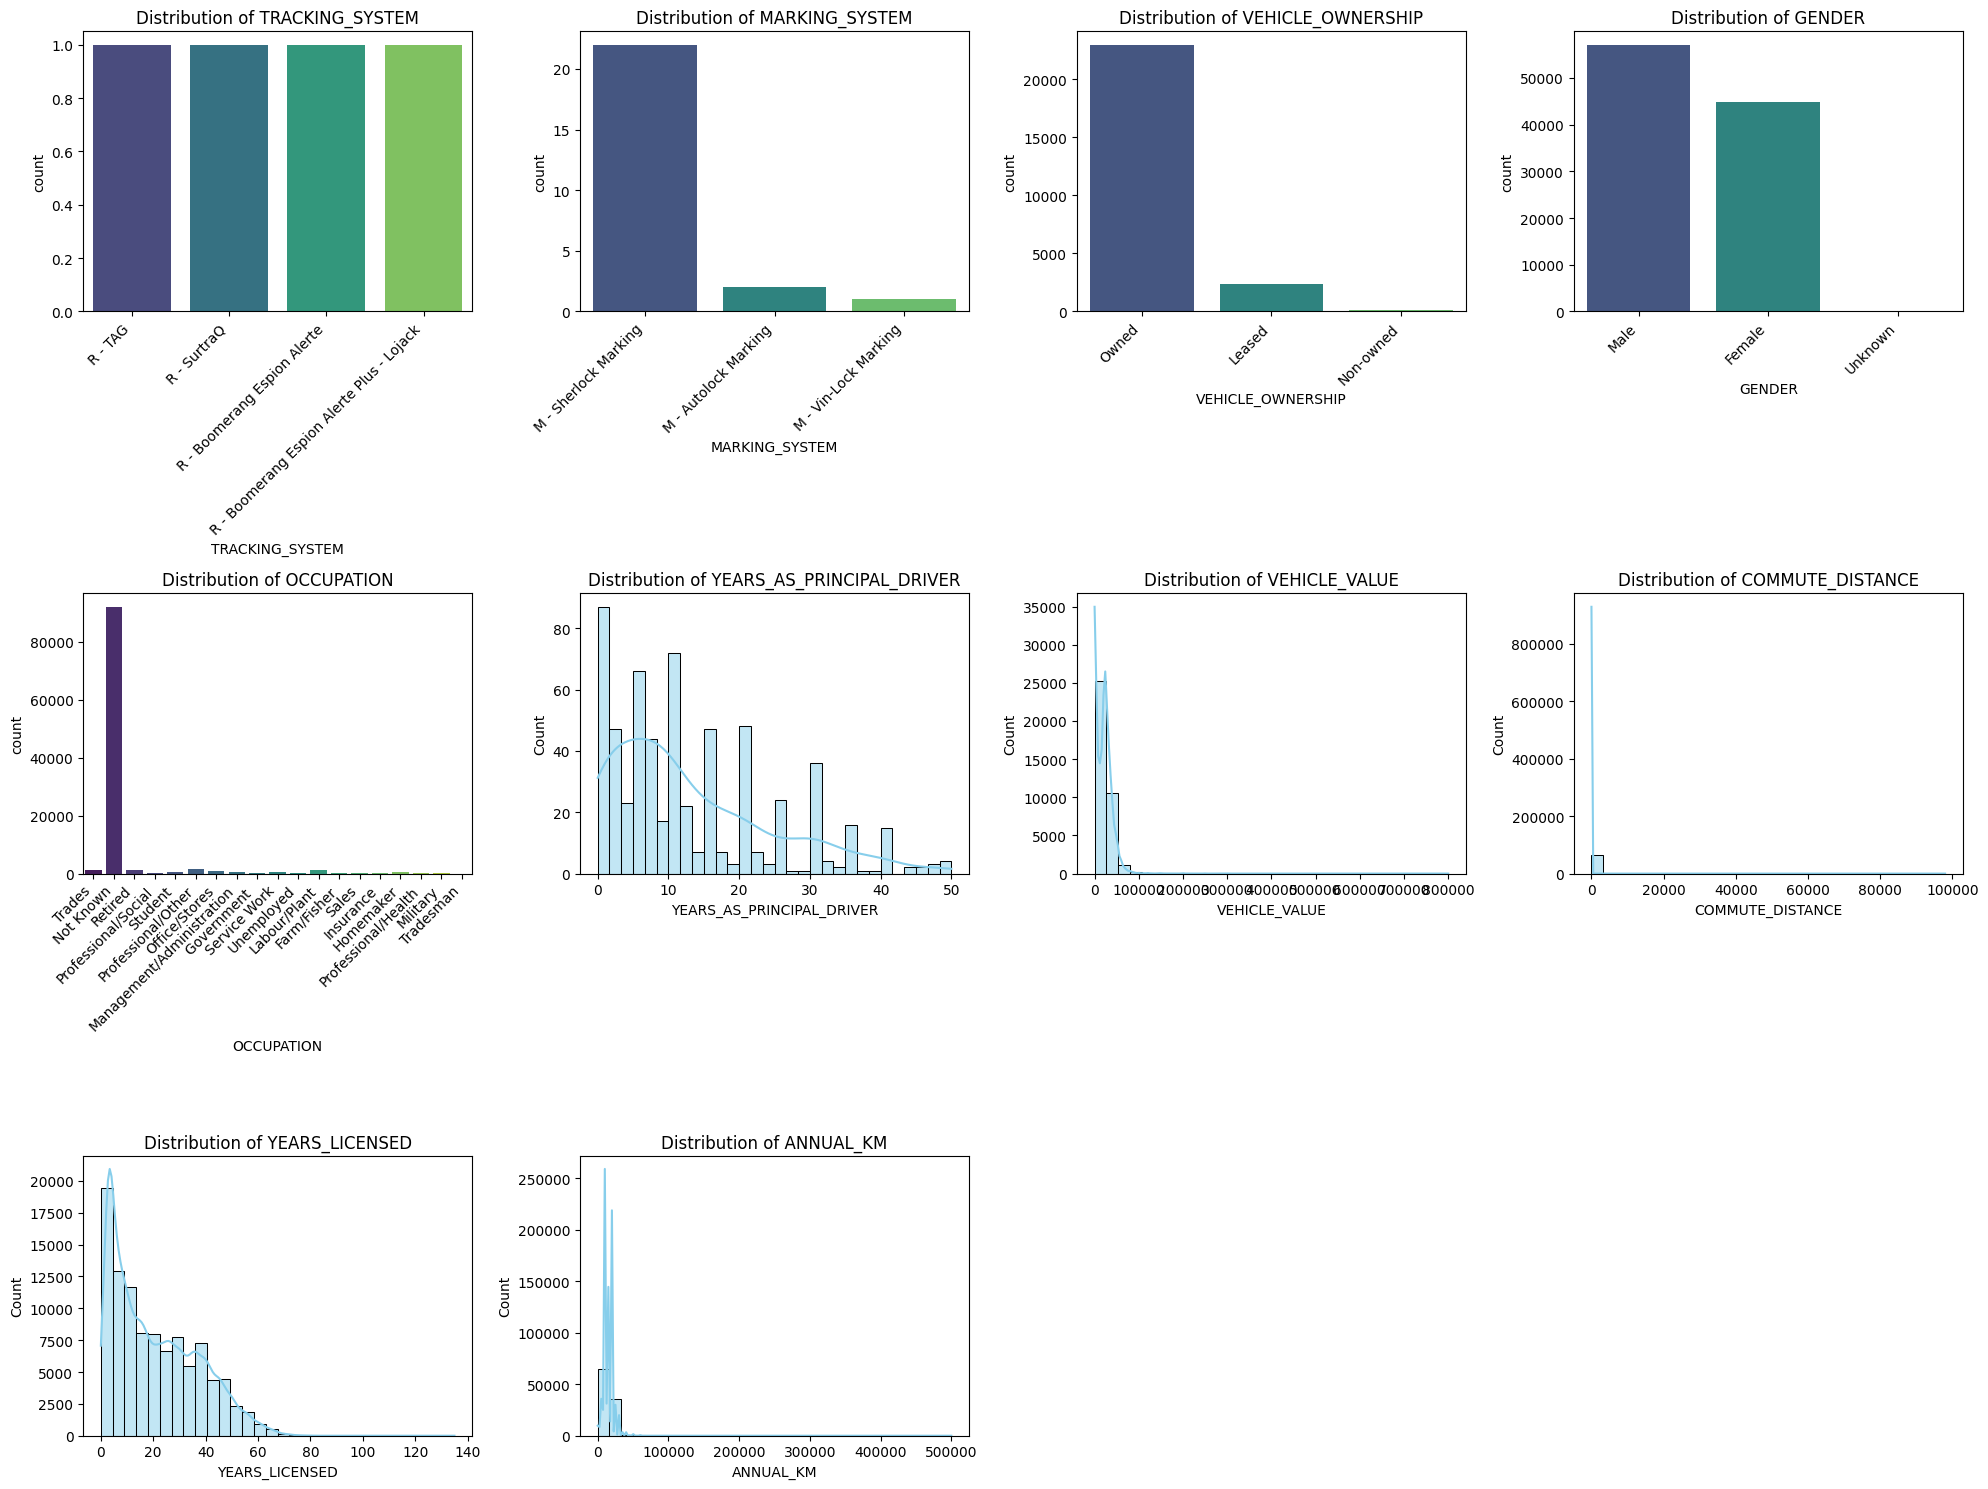

In [ ]:
features_in_graph = ["TRACKING_SYSTEM", "MARKING_SYSTEM", "YEARS_AS_PRINCIPAL_DRIVER",
                     "VEHICLE_OWNERSHIP", "VEHICLE_VALUE", "COMMUTE_DISTANCE",
                     "YEARS_LICENSED", "GENDER", "ANNUAL_KM", "OCCUPATION"]

# Separate categorical and numerical features for appropriate plots
categorical_features = ["TRACKING_SYSTEM", "MARKING_SYSTEM", "VEHICLE_OWNERSHIP", "GENDER", "OCCUPATION"]
numerical_features = ["YEARS_AS_PRINCIPAL_DRIVER", "VEHICLE_VALUE", "COMMUTE_DISTANCE", "YEARS_LICENSED", "ANNUAL_KM"]

# Plotting
plt.figure(figsize=(20,15))

# Plotting categorical features
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3,4,i)
    sns.countplot(data=data_train, x=feature, palette="viridis")
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right', fontsize=10)

# Plotting numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3,4,i+len(categorical_features))
    sns.histplot(data_train[feature], bins=30, color="skyblue", kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()


We can see from above plots that some of the features with missing values are categorical in nature and some are continuous. The distribution of continuous variables is skewed and from distribution of categorical features we can see that some categories are more frequent than the others.

# **FILLING IN MISSING VALUES**

Now we start imputing the missing values one by one.

### TRACKING_SYSTEM and MARKING_SYSTEM

These are categorical feature that indicates the types of Tracking and Marking Systems installed in the vehicles. Missing values may indicate that such systems are not installed the vehicles. Hence we fill the misisng values with 'None'.

In [ ]:
# Fill missing values in TRACKING_SYSTEM and MARKING_SYSTEM with "None"
data_train['TRACKING_SYSTEM'].fillna('None', inplace=True)
data_train['MARKING_SYSTEM'].fillna('None', inplace=True)


# Fill missing values in TRACKING_SYSTEM and MARKING_SYSTEM with "None"
data_test['TRACKING_SYSTEM'].fillna('None', inplace=True)
data_test['MARKING_SYSTEM'].fillna('None', inplace=True)

### VEHICLE_OWNERSHIP

This is also a categorical feature which indicates the ownership status of the vehicle (for example, whether the person owns or leases the car). The missing values indicate that the person did not specify their ownership status and hence this feature would be unknown to the insurance company. Based on this idea, we fill the missing values in this column with 'Unknown'.

In [ ]:
#VEHICLE OWNERSHIP HAS 75% MISSING VALUES ,BUT COULD BE AN IMPORTANT , LETS FILL THE MISSING VALUES WITH UNKNOWN

data_train['VEHICLE_OWNERSHIP'].fillna('Unknown', inplace=True)

data_test['VEHICLE_OWNERSHIP'].fillna('Unknown', inplace=True)

### GENDER

Only the training data has missing values in this column and from our plot earlier we can see that only 5 values are missing from this column. Its tricky to impute gender values,and since we have a very large dataset losing 5 rows wont make much of a difference. Hence, we remove the rows that have missing gender values.

In [ ]:
# Filtering rows where GENDER values are missing
missing_gender_rows = data_train[data_train['GENDER'].isna()]

# Print those rows
missing_gender_rows

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
14254,2016-03-23,2008,HYUNDAI,ELANTRA GL 4DR,5000.0,NaN,None,None,Unknown,40000.0,...,NaN,Yes,Single,Office/Stores,0,0,0,0,0,0
14651,2016-03-24,2016,FORD TRUCK/VAN,F250 SD LARIAT SUPERCAB 4WD DIESEL,15000.0,10.0,None,None,Owned,NaN,...,NaN,Yes,Married,Labour/Plant,1,0,0,0,0,1
29908,2016-05-06,2005,FORD,FOCUS ZX4 S 4DR,15000.0,10.0,None,None,Unknown,NaN,...,NaN,No,Single,Student,0,0,0,0,0,0
87731,2016-10-31,2006,PONTIAC,G6 SE 4DR,12000.0,5.0,None,None,Unknown,NaN,...,NaN,Yes,Married,Office/Stores,0,0,0,0,0,0
97039,2016-12-05,2007,MAZDA TRUCK/VAN,B3000 CAB PLUS 4DR 2WD,20000.0,15.0,None,None,Unknown,20000.0,...,NaN,Yes,Single,NaN,0,0,0,0,0,0


In [ ]:
# Drop rows where GENDER is missing
data_train = data_train.dropna(subset=['GENDER'])



### OCCUPATION

This is also a categorical feature that has only 1 misisng value in our training data. But most values in this column are filled as "Not Known", so we fill the missing value with 'Not Known'.

In [ ]:
# Filling the misisng values in OCCUPATION with Not Known
data_train["OCCUPATION"].fillna('Not Known', inplace=True)


### ANNUAL_KM

This is a numerical feature that indicates the amount of distance that the vehicle will be driven in a year. As seen from the plot, only one value of ANNUAL_KM is missing in data_train and the test data doesnot have any missing ANNUAL_KM values. Lets take a closer look at the row with missing ANNUAL_KM value,

In [ ]:
missing_annual_km_rows = data_train[data_train['ANNUAL_KM'].isna()]

# Print those rows
missing_annual_km_rows

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
94545,2016-11-23,2012,HONDA,CIVIC LX 4DR,NaN,15.0,None,None,Unknown,NaN,...,NaN,Yes,Unknown,Not Known,0,0,0,0,0,0


By looking at the row with missing ANNUAL_KM value, we can immediately see that it has another feature COMMUTE_DISTANCE with a value of 15. Commute Distance directly correlated to ANNUAL_KM as if the commute distance is higher, the annual km will automatically by higher. Keeping this in mind, we get the mean of all ANNUAL_KM values that have a corresponding COMMUTE_DISTANCE value of 15. Then we impute this missing ANNUAL_KM value with that mean.

In [ ]:
# Calculate the average ANNUAL_KM for people with COMMUTE_DISTANCE of 15
avg_annual_km = data_train[data_train['COMMUTE_DISTANCE'] == 15]['ANNUAL_KM'].mean()

# Round the average value to the nearest ten thousands
rounded_avg_annual_km = round(avg_annual_km, -3)

# Fill the missing value in ANNUAL_KM with the rounded average
data_train.loc[data_train['ANNUAL_KM'].isnull(), 'ANNUAL_KM'] = rounded_avg_annual_km


### COMMUTE_DISTANCE

From the plots created in Visualization section, we can see that both training and test data have a good portion of missing values in COMMUTE_DISTANCE column. \\
Initially we decide to impute these missing values by extracting the information from ANNUAL_KM column as there are no missing values in ANNUAL_KM anymore and these two features are correlated with each other. To achieve this, we first divided the corresponding "ANNUAL_KM" values by 365 to convert them to a daily commute distance. Next, we divided this result by 2 to obtain a one-way commute distance. \\
$$ COMMUTE \_\ DISTANCE = \frac{ANNUAL \_\ KM } {365  \times 2} $$ \\
Finally, we rounded these values to the nearest whole numbers. These rounded values were then used to impute the missing entries in the "COMMUTE_DISTANCE" column. This approach allowed us to effectively fill in the missing commute distances based on the available information from "ANNUAL_KM." \\
The following commented out code section shows this attempt of imputation.

In [ ]:
# #DIVIDE CORRESPONDING ANNUAL_KM BY 365 THEN DIVIDE THE RESULT BY 2 (TO GET 1 WAY COMMUTE DISTANCE) THEN ROUND IT TO NEAREST ONES
# # AND IMPUTE THE MISSING VALUES OF COMMUTE DISTANCE WITH THOSE VALUES

# # Calculate the imputed values
# commute_dist_values_train = (data_train[data_train['COMMUTE_DISTANCE'].isnull()]['ANNUAL_KM'] / 365 / 2).round()

# # Fill the missing values in COMMUTE_DISTANCE with the calculated imputed values
# data_train.loc[data_train['COMMUTE_DISTANCE'].isnull(), 'COMMUTE_DISTANCE'] = commute_dist_values_train

# # Verify if the missing values have been filled
# print(data_train[data_train['COMMUTE_DISTANCE'].isnull()])


But in search of most effective way of data preprocessing to minimize the error, we determined that dropping this feature yielded in better results.One reason could be because COMMUTE_DISTANCE has a direct correlation with ANNUAL_KM and both of these features give us pretty much the same information. So for our final model, we decided to drop this feature.

In [ ]:
data_train.drop('COMMUTE_DISTANCE',axis = 1,inplace=True) #Dropping COMMUTE_DISTANCE from data_train
data_test.drop('COMMUTE_DISTANCE',axis = 1,inplace=True) #Dropping COMMUTE_DISTANCE from data_test

### YEARS_AS_PRINCIPAL_DRIVER

This feature has too many missing values and there are no other correlated features that can be used to estimate these values. Hence we drop this column from both training and test data.

In [ ]:
# # #YEARS_AS_PRINCIPAL_DRIVER HAS MANY MISSING VALUES, so we are dropping it
data_train.drop('YEARS_AS_PRINCIPAL_DRIVER',axis=1,inplace=True)
data_test.drop('YEARS_AS_PRINCIPAL_DRIVER',axis=1,inplace=True)

### YEARS_LICENSED

YEARS_LICENSED column provides the information about the number of years the customer has been licensed for and could be an important factor in determining insurance quote, which can impact a persons decision of buying the insurance. So we wanted to make sure that we are imputing these missing values effectively.

Initially in our preprocessing step,we had implemented a specific approach to address missing values in the YEARS_LICENSED column. We started with the fact that the minimum age to obtain a driver's license in Ontario is 16 years. This formed the foundation of our strategy, as we knew that 'Years Licensed' would be closely related to the date of birth. Since our dataset was from 2016, it was unlikely for individuals born after 2000 to have a valid driver's license.

To correct this, we focused on entries where the YEAR_OF_BIRTH was listed as post-2000. We recalculated these YEAR_OF_BIRTH values using the formula:

$ \text{YEAR_OF_BIRTH} = \text{QUOTEYEAR} - (\text{YEARS_LICENSED} + 16) $

After adjusting the YEAR_OF_BIRTH, we recalculated AGE_WHEN_QUOTED, which represents the age of the individual at the time of the insurance quote. This was done using the formula:

$ \text{AGE_WHEN_QUOTED} = \text{QUOTEYEAR} - \text{YEAR_OF_BIRTH} $

Subsequently, we computed the MAX_YEARS_LICENSED, which is the maximum feasible number of years a person could have been licensed, using the formula:

$ \text{MAX_YEARS_LICENSED} = \text{AGE_WHEN_QUOTED} - 16 $

We used this value to correct any YEARS_LICENSED entries that exceeded this maximum, ensuring that the years licensed did not surpass the maximum possible since the legal licensing age.

For rows missing the YEARS_LICENSED data, we imputed these values with MAX_YEARS_LICENSED, which offered a logical and calculated estimate based on the individual's age and the legal driving age.



The following code shows this attempt.

In [ ]:
# # Resetting the index to ensure it is unique
# data_train = data_train.reset_index(drop=True)

# # Only for rows where YEAR_OF_BIRTH > 2000, recalculating YEAR_OF_BIRTH
# birth_after_2000 = data_train['YEAR_OF_BIRTH'] > 2000
# data_train.loc[birth_after_2000, 'YEAR_OF_BIRTH'] = data_train['QUOTEYEAR'] - (data_train['YEARS_LICENSED'] + 16)
# # Now, correcting only the YEARS_LICENSED values that are greater than (2016 - YEAR_OF_BIRTH) - 16
# data_train['AGE_WHEN_QUOTED'] = data_train['QUOTEYEAR'] - data_train['YEAR_OF_BIRTH']  # Recalculating AGE_IN_2016 based on the potentially new YEAR_OF_BIRTH
# data_train['MAX_YEARS_LICENSED'] = data_train['AGE_WHEN_QUOTED'] - 16
# invalid_years_licensed = data_train['YEARS_LICENSED'] > data_train['MAX_YEARS_LICENSED']
# data_train.loc[invalid_years_licensed, 'YEARS_LICENSED'] = data_train['MAX_YEARS_LICENSED']

# # Filling missing values in YEARS_LICENSED with (2016 - YEAR_OF_BIRTH - 16)
# missing_years_licensed = data_train['YEARS_LICENSED'].isnull()
# data_train.loc[missing_years_licensed, 'YEARS_LICENSED'] = data_train['MAX_YEARS_LICENSED']

# data_train = data_train.drop(columns=['MAX_YEARS_LICENSED'])
# data_train[['YEAR_OF_BIRTH', 'YEARS_LICENSED']].head()



After fitting our model and evaluating its performance, we revisited our preprocessing steps. Upon review, we discovered that a straightforward mean imputation method actually resulted in better prediction accuracy. Consequently, we decided to drop our earlier, more complex approach in favor of this simpler mean imputation technique. This change was based on the improved results it provided for our model's predictions.

In [ ]:
# Calculating the mean of the 'YEARS_LICENSED' column in the training data
mean_years_licensed = data_train['YEARS_LICENSED'].mean()

# Replacinf missing values with the mean in both datasets
data_train['YEARS_LICENSED'].fillna(mean_years_licensed, inplace=True)
data_test['YEARS_LICENSED'].fillna(mean_years_licensed, inplace=True)

### VEHICLEMAKE

This column gives information about the brand of the vehicle. Upon examining the column we noticed that a lot of these names were misspelled.
Our goal here is to ensure that the vehicle make names are consistent. Here's how we approached it:

* We started by creating a dictionary called vehicle_make_patterns. This dictionary maps various patterns and common misspellings found in our dataset to the correct vehicle make names. For example, variations like 'CURA', 'ALFA', 'CHEV', 'CEVROLET', 'CHERVOLET', etc., are mapped to their standard names like 'ACURA', 'ALFAROMEO', 'CHEVROLET', and so on.

* Next, we iterate through this dictionary and update a new column 'VEHICLEMAKE_NEW' in both training and test datasets. We use a mask to identify rows where the 'VEHICLEMAKE' column contains any of the patterns from our dictionary. Then, we replace these with the standardized names. This step ensures that all variations of a vehicle make are uniformly represented.

* After fixing the names, we address outliers. These are unique or rare vehicle make names that don't fit well with the rest of the data. We identified a list of such outliers. For these, instead of trying to find a standard name, we categorize them as 'OUTLIER'. This helps reduce noise in the data, as these outliers might not be significant enough to affect the overall analysis but could introduce unnecessary variance.

* Once these steps are complete, we replace the original 'VEHICLEMAKE' column with our newly created 'VEHICLEMAKE_NEW' column. The original column is then deleted to avoid redundancy.



The following code sections show the implementation of this approach.



In [ ]:
# Dictionary mapping patterns to vehicle makes
vehicle_make_patterns = {
    'TRUCK|CAMION': 'TRUCK_OR_CAMION',
    'CURA': 'ACURA',
    'ALFA': 'ALFAROMEO',
    ' CAT': 'ARCTICCAT',
    'BOMB': 'BOMBARDIER',
    'CADIL': 'CADILLAC',
    'CHEV|CEVROLET|CHERVOLET|CHCVIOE': 'CHEVROLET',
    'CHR|CRYSLER|CHYRSLER': 'CHRYSLER',
    'ROLLA': 'CORROLLA',
    'DODGE|DOGDE': 'DODGE',
    'FORD|1FTFW1EF8BFA01523': 'FORD',
    'HON': 'HONDA',
    'HYU|HYN|HUN': 'HYUNDAI',
    'INFIN': 'INFINITI',
    'JEEP|JEPP': 'JEEP',
    'ROVER': 'LANDROVER',
    'MERC': 'MERCEDES-BENZ',
    'MECEDEZ': 'MERCEDES-BENZ',
    'MIT': 'MITSUBISHI',
    'NIS|2XXXXXXXXXXXXXXXXXX': 'NISSAN',
    'PONT|POTIAC': 'PONTIAC',
    'POR|PROSCHE': 'PORSCHE',
    'VOLK|VOLGSWAGEN|VOLSWAGEN|VW|WV': 'VOLKSWAGEN',
    'TOY|TOTOTA': 'TOYOTA',
    'MAZDS|MAZDA': 'MAZDA',
    'SKI-DOO': 'SKIDOO',
    'ELANTRA': 'ELANTRA',
    'FOREST': 'FOREST',
    'GMC': 'GMC',
    'GRAND': 'GRAND',
    'HARLEY': 'HARLEY',
}

outliers = ['AMC', 'ARCTIC CAT', 'ALFA ROMEO', 'HIGH COUNTRY', 'RYMCO', 'NEW HOLLAND',
            'MGB', 'LEXUS CAMION/VAN', 'LADA', 'KTM', 'JOHN DEERE', 'GRAND', 'ALTIMA',
            'FREIGHTLINER', 'EL CAMINO', 'CORVETTE', 'CAMRY', 'BENTLEY TRUCK/VAN', 'ASTRO', 'SHELBY']

# Create new column with correct values
data_train['VEHICLEMAKE_NEW'] = data_train['VEHICLEMAKE']

# Iterate through the dictionary and update the VEHICLEMAKE_NEW column
for pattern, make in vehicle_make_patterns.items():
    mask = data_train['VEHICLEMAKE'].str.contains(pattern, case=False, na=False)
    data_train.loc[mask, 'VEHICLEMAKE_NEW'] = make

# Handling outliers

data_train['VEHICLEMAKE'] = np.where(data_train['VEHICLEMAKE'].isin(outliers), 'OUTLIER', data_train['VEHICLEMAKE_NEW'])

# Clean up
del data_train['VEHICLEMAKE_NEW']


In [ ]:
# Create new column with default values
data_test['VEHICLEMAKE_NEW'] = data_test['VEHICLEMAKE']

# Iterate through the dictionary and update the VEHICLEMAKE_NEW column
for pattern, make in vehicle_make_patterns.items():
    mask = data_test['VEHICLEMAKE'].str.contains(pattern, case=False, na=False)
    data_test.loc[mask, 'VEHICLEMAKE_NEW'] = make

data_test['VEHICLEMAKE'] = np.where(data_test['VEHICLEMAKE'].isin(outliers), 'OUTLIER', data_test['VEHICLEMAKE_NEW'])

# Clean up
del data_test['VEHICLEMAKE_NEW']

While reviewing the data, we found that in the 'VEHICLEMAKE' section, some entries were listed as 'Elantra', which is actually a model name and not the make of the vehicle. 'Elantra' is a model made by Hyundai. To correct this, we updated these entries: wherever 'Elantra' appeared in the 'VEHICLEMAKE' column, we changed it to 'Hyundai', which is the actual make of the car. At the same time, we made sure to update the corresponding model information in the dataset to 'Elantra', to accurately reflect the specific model of the Hyundai vehicle.

``Note: There could be other such errors, but since we had a very large dataset going through it row by row was not possible, but we tried to be as thorough as possible.``

In [ ]:
# REPLACING ELANTRAS IN MAKE WITH HYUNDAI AND ADDING ELANTRA TO MODEL
for index, row in data_train.iterrows():
    if 'ELANTRA' in row['VEHICLEMAKE']:
        # Replace VEHICLEMAKE with 'HYUNDAI'
        data_train.at[index, 'VEHICLEMAKE'] = 'HYUNDAI'
        # Check VEHICLEMODEL and adjust accordingly
        if 'ELANTRA' not in row['VEHICLEMODEL']:
            if 'HYUNDAI' in row['VEHICLEMODEL']:
                data_train.at[index, 'VEHICLEMODEL'] = 'ELANTRA'
            else:
                data_train.at[index, 'VEHICLEMODEL'] = 'ELANTRA ' + row['VEHICLEMODEL']


In [ ]:
#Checking the unique values in VEHICLEMAKE
data_train['VEHICLEMAKE'].unique()

array(['VOLKSWAGEN', 'HYUNDAI', 'CHEVROLET', 'TOYOTA', 'HONDA', 'PONTIAC',
       'TRUCK_OR_CAMION', 'SMART', 'MAZDA', 'FORD', 'DODGE', 'NISSAN',
       'JEEP', 'MERCEDES-BENZ', 'INFINITI', 'KIA', 'CHRYSLER', 'MINI',
       'SUBARU', 'ACURA', 'GMC', 'VOLVO', 'BUICK', 'PORSCHE', 'BMW',
       'LANDROVER', 'CADILLAC', 'SUZUKI', 'SATURN', 'BENTLEY', 'LEXUS',
       'SAAB', 'LINCOLN', 'OLDSMOBILE', 'MITSUBISHI', 'AUDI', 'FIAT',
       'SCION', 'JAGUAR', 'OUTLIER', 'MASERATI', 'YAMAHA', 'MATRIX',
       'PLYMOUTH', 'SIERRA 2500', 'MAILBOU', 'F250', 'TESLA',
       'LAMBORGHINI', 'KENWORTH', 'HINO', 'HUMMER', 'UNDISCLOSED',
       'ALFAROMEO', 'GRAND', 'FERRARI', 'TRIU', 'ARCTICCAT', 'F150',
       'COACHMEN', 'AMERICAN MOTORS', 'MOBILITY VENTURES', 'GEO',
       'ASTON MARTIN', 'TRIUMPH', 'EAGLE', 'BRICKLIN', 'FOREST',
       'INTERNATIONAL', 'MUSTANG', 'E350', 'ROLLS ROYCE', 'CORROLLA',
       'PASSAT', 'VUE', 'HARLEY', 'SCOOTTERRE', 'MG', 'TRIPLE E', 'JETTA',
       'TRAVEL', 'MCLAREN', '

## VEHICLE_VALUE



This column provides the value (or price) of the vehicle. It is important to understand that the vehicle value is highly dependent on the type of vehicle, where premium luxury vehicles or specialized vehicles like RVs typically have higher values compared to other brands. For an effective imputation of missing values, we first defined a function that extracts the make and category of each vehicle, categorizing them into regular cars, trucks, vans, or luxury/specialized vehicles. This type of categorization was used because it acknowledges the differences in vehicle values based on their type and brand. \\
Then, we calculated the mean value of each group, grouping vehicles by their make, model, year, and category. These group mean values provide a reliable estimate for similar vehicles, ensuring that our imputation is aligned with realistic market values. After calculating these means, we imputed the missing values in the 'VEHICLE_VALUE' column with these group means, which helps in maintaining consistency in our dataset. \\
For any remaining missing values, we filled them with the median value of the 'VEHICLE_VALUE' column. The median is less influenced by outliers, making it an effective choice for imputing missing values where group means are not available. This approach ensures that our dataset accurately reflects the varying values of different types of vehicles and is an effective imputation method in this case.

In the end, we rounded the values to remove any decimals.

In [ ]:

# List of luxury and specialized makes which usually have higher value
luxury_and_specialised_vehicles = [
    'BMW', 'MERCEDES-BENZ', 'PORSCHE', 'LEXUS', 'INFINITI', 'ACURA',
    'AUDI', 'CADILLAC', 'BENTLEY', 'MASERATI', 'TESLA', 'LAMBORGHINI',
    'ALFAROMEO', 'FERRARI', 'ASTON MARTIN', 'ROLLS ROYCE', 'MCLAREN',
    'JAGUAR', 'LINCOLN', 'AMERICAN MOTORS', 'AM GENERAL', 'COBRA - AC',
    'GULF STREAM', 'MOBILITY VENTURES', 'STREET GLIDE SPECIAL', 'TRAIL LIGHT',
    'TRAILLITE', 'TRIPLE E', 'AUSTIN-HEALEY', 'KENWORTH'
]

# Trucks, Vans, and Camions
trucks_vans_camions = ['TRUCK/VAN', 'CAMION/VAN'] #to extract the types of vehicles as these features also impact vehicle value

# Defining the Function to extract the Make and category
def extract_brand_and_category(make):
    make_only = make.split()[0]
    category = 'Regular' if make_only.upper() not in luxury_and_specialised_vehicles else 'Luxury/Specialized'
    for keyword in trucks_vans_camions:
        if keyword in make:
            category = keyword
            break
    return make_only, category

In [ ]:
# Applying the function to extract the Brand and category
data_train[['MAKE_ONLY', 'VEHICLE_CATEGORY']] = data_train.apply(lambda x: extract_brand_and_category(x['VEHICLEMAKE']), axis=1, result_type='expand')

# Calculating the mean value for each group
grouped_means = data_train.groupby(['MAKE_ONLY', 'VEHICLEMODEL', 'VEHICLEYEAR', 'VEHICLE_CATEGORY'])['VEHICLE_VALUE'].transform('mean')

# Imputing missing values with the group mean
data_train.loc[data_train['VEHICLE_VALUE'].isna(), 'VEHICLE_VALUE'] = grouped_means

# Calculating the median of the 'VEHICLE_VALUE' column
median_vehicle_value = data_train['VEHICLE_VALUE'].median()

# Imputing any remaining missing values with the median
data_train['VEHICLE_VALUE'].fillna(median_vehicle_value, inplace=True)

# Rounding the values
data_train['VEHICLE_VALUE'] = data_train['VEHICLE_VALUE'].round()

# Dropping unnecessary columns
data_train.drop(columns=['MAKE_ONLY', 'VEHICLE_CATEGORY'], inplace=True)


Then we apply the same approach in test data.

In [ ]:
# Applying the function to the 'VEHICLEMAKE' column in data_test
data_test[['MAKE_ONLY', 'VEHICLE_CATEGORY']] = data_test.apply(lambda x: extract_brand_and_category(x['VEHICLEMAKE']), axis=1, result_type='expand')

# Calculating the mean value for each group in data_test
grouped_means_test = data_test.groupby(['MAKE_ONLY', 'VEHICLEMODEL', 'VEHICLEYEAR', 'VEHICLE_CATEGORY'])['VEHICLE_VALUE'].transform('mean')

# Imputing missing values with the group mean
data_test.loc[data_test['VEHICLE_VALUE'].isna(), 'VEHICLE_VALUE'] = grouped_means_test

# Calculating the median of the entire 'VEHICLE_VALUE' column in data_test
median_vehicle_value_test = data_test['VEHICLE_VALUE'].median()

# Imputing any remaining missing values with the median
data_test['VEHICLE_VALUE'].fillna(median_vehicle_value_test, inplace=True)

#  Rounding the values
data_test['VEHICLE_VALUE'] = data_test['VEHICLE_VALUE'].round()

# Dropping unnecessary columns
data_test.drop(columns=['MAKE_ONLY', 'VEHICLE_CATEGORY'], inplace=True)



# FEATURE ENGINEERING

## VEHICLE_CLASSIFICATION

Our dataset contains vehicles that fall into different classifications, such as Luxury / Specialized vehicles and Regular Vehicles. We have already defined the variable luxury_and_specialised_vehicles which contains higher end vehicle brands like BMW, Porsche etc. Lets create a different column to define the classification of the vehicles.

In [ ]:
#Function to classify the vehicles
def classify_vehicle_luxury_or_regular(make):
    if make in luxury_and_specialised_vehicles:
        return 'Luxury/Specialized'
    else:
        return 'Regular'

# Applying the classification function to data_test and data_train
data_train['VEHICLE_CLASSIFICATION'] = data_train['VEHICLEMAKE'].apply(classify_vehicle_luxury_or_regular)
data_test['VEHICLE_CLASSIFICATION'] = data_test['VEHICLEMAKE'].apply(classify_vehicle_luxury_or_regular)

##BODYSTYLE

The vehicles in our dataset have different bodystyles and the body-style is attached with the Make of the vehicle. (For example TOYOTA TRUCK/VAN). We separate the make from the bodystyle and create a new column, for the vehicles that dont have bodystyle listed , we fill them as SEDAN/SUV/COUPE

In [ ]:
# Function to identify and extract the body style
def identify_bodystyle(vehicle_make):
    for keyword in trucks_vans_camions:
        if keyword in vehicle_make:
            return keyword
    return 'SEDAN/SUV/COUPE'

# Applying the function to the 'VEHICLEMAKE' column to create a new 'BODYSTYLE' column
data_train['BODYSTYLE'] = data_train['VEHICLEMAKE'].apply(identify_bodystyle)

for keyword in trucks_vans_camions:
    data_train['VEHICLEMAKE'] = data_train['VEHICLEMAKE'].str.replace(keyword, '')   # Removing the bodystyle from 'VEHICLEMAKE'

# Removing the space left after removal
data_train['VEHICLEMAKE'] = data_train['VEHICLEMAKE'].str.strip()

In [ ]:
# Applying the function to the 'VEHICLEMAKE' column to create a new 'BODYSTYLE' column
data_test['BODYSTYLE'] = data_test['VEHICLEMAKE'].apply(identify_bodystyle)

for keyword in trucks_vans_camions:
    data_test['VEHICLEMAKE'] = data_test['VEHICLEMAKE'].str.replace(keyword, '') # Removing the bodystyle from 'VEHICLEMAKE'

# Removing the space left after removal
data_test['VEHICLEMAKE'] = data_test['VEHICLEMAKE'].str.strip()

Now that we have extracted and engineered features that encompass the necessary information about the vehicles, lets drop the VEHICLEMODEL column

In [ ]:
data_train.drop('VEHICLEMODEL',axis=1,inplace=True)
data_test.drop('VEHICLEMODEL',axis=1,inplace=True)



```
# This is formatted as code
```

## VEHICLE_YEAR

VEHICLE_YEAR provides information about how new or old the vehicle is and could be important in our classification task. Here the idea is to one-hot encode this feature but since it is stored as a number, we convert it to string (object) type for encoding purposes.

In [ ]:
data_train['VEHICLEYEAR'] = data_train['VEHICLEYEAR'].astype(str)
data_test['VEHICLEYEAR'] = data_test['VEHICLEYEAR'].astype(str)

## YEAR_OF_BIRTH

This provides information about how old the customer is. Following the same idea as in VEHICLE_YEAR, we convert this to string type for encoding purposes.

In [ ]:
data_train['YEAR_OF_BIRTH'] = data_train['YEAR_OF_BIRTH'].astype(str)
data_test['YEAR_OF_BIRTH'] = data_test['YEAR_OF_BIRTH'].astype(str)

##QUOTEDATE

To capture all relevant information from QUOTEDATE, we extract 'QUOTEQUARTER' , 'QUOTEMONTH' , 'QUOTEWEEK' and 'QUOTEDAY' from QUOTEDATE

In [ ]:
data_train['QUOTEDATE'] = pd.to_datetime(data_train['QUOTEDATE'])
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

data_train['QUOTEQUARTER'] = data_train['QUOTEDATE'].dt.to_period('Q').astype(str)
data_train['QUOTEMONTH'] = data_train['QUOTEDATE'].dt.to_period('M').astype(str)
data_train['QUOTEWEEK'] = data_train['QUOTEDATE'].dt.to_period('W').astype(str)
data_train['QUOTEDAY'] = data_train['QUOTEDATE'].dt.dayofweek.map(days).astype(str)


In [ ]:
data_test['QUOTEDATE'] = pd.to_datetime(data_test['QUOTEDATE'])
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

data_test['QUOTEQUARTER'] = data_test['QUOTEDATE'].dt.to_period('Q').astype(str)
data_test['QUOTEMONTH'] = data_test['QUOTEDATE'].dt.to_period('M').astype(str)
data_test['QUOTEWEEK'] = data_test['QUOTEDATE'].dt.to_period('W').astype(str)
data_test['QUOTEDAY'] = data_test['QUOTEDATE'].dt.dayofweek.map(days).astype(str)

Since we have extracted all necessary information from QUOTEDATE, we can drop this column from both training and test datasets

In [ ]:
 #Dropping QUOTEDATE from both datasets
data_train.drop('QUOTEDATE',axis=1,inplace=True)
data_test.drop('QUOTEDATE',axis=1,inplace=True)

## AREA CODE AND POSTAL CODE

Area and Postal codes provide similar information and since we have more unique values in Postal Code, we drop Area code. POSTAL_CODE has too many unique values and would result in a very high-dimensional dataset if we were to one-hot encode it. To avoid this issue, we employ a strategic approach by splitting the postal code three ways. Canadian postal codes typically follow the format 'A1B,' hence, after splitting, the 1st and 3rd columns contain letters, and the middle column contains a number."

Splitting the POSTAL_CODE in this manner primarily solves the problem of high dimensionality that would arise if we were to one-hot encode the original "POSTAL_CODE" directly. By breaking it down into three columns, we create a more manageable dataset.After performing this operation, when we encode these columns, the maximum number of resulting columns will be considerably lower than what we would have encountered without this split. To provide some context, even if we consider the widest range of values, from 'A' to 'Z' on two columns and '0' to '9' on the middle column, the maximum number of resulting columns would be 62. This approach enables us to capture all the necessary information from postal codes while maintaining a reasonable number of features

In [ ]:
#Dropping AREA_CODE from data_train and data_test
data_train.drop('AREA_CODE',axis=1,inplace=True)
data_test.drop('AREA_CODE',axis=1,inplace=True)

In [ ]:
data_train[['POSTAL_CODE']].astype(str)

# Extracting the first letter, second number, and third letter from the postal code
data_train['Postal_Code_1st_Letter'] = data_train['POSTAL_CODE'].str[0]
data_train['Postal_Code_2nd_Number'] = data_train['POSTAL_CODE'].str[1]
data_train['Postal_Code_3rd_Letter'] = data_train['POSTAL_CODE'].str[2]

# Dropping the 'POSTAL_CODE' feature from data_train
data_train.drop('POSTAL_CODE',axis=1,inplace=True)


In [ ]:
data_test[['POSTAL_CODE']].astype(str)

# Extracting the first letter, second number, and third letter from the postal code
data_test['Postal_Code_1st_Letter'] = data_test['POSTAL_CODE'].str[0]
data_test['Postal_Code_2nd_Number'] = data_test['POSTAL_CODE'].str[1]
data_test['Postal_Code_3rd_Letter'] = data_test['POSTAL_CODE'].str[2]

# Dropping the 'POSTAL_CODE' feature from data_train
data_test.drop('POSTAL_CODE',axis=1,inplace=True)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101886 entries, 0 to 101890
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   VEHICLEYEAR                     101886 non-null  object 
 1   VEHICLEMAKE                     101886 non-null  object 
 2   ANNUAL_KM                       101886 non-null  float64
 3   MARKING_SYSTEM                  101886 non-null  object 
 4   TRACKING_SYSTEM                 101886 non-null  object 
 5   VEHICLE_OWNERSHIP               101886 non-null  object 
 6   VEHICLE_VALUE                   101886 non-null  float64
 7   VEHICLEUSE                      101886 non-null  object 
 8   GENDER                          101886 non-null  object 
 9   YEAR_OF_BIRTH                   101886 non-null  object 
 10  YEARS_LICENSED                  101886 non-null  float64
 11  MULTI_PRODUCT                   101886 non-null  object 
 12  MARITAL_STATUS  

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15114 entries, 0 to 15113
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   VEHICLEYEAR                     15114 non-null  object 
 1   VEHICLEMAKE                     15114 non-null  object 
 2   ANNUAL_KM                       15114 non-null  int64  
 3   MARKING_SYSTEM                  15114 non-null  object 
 4   TRACKING_SYSTEM                 15114 non-null  object 
 5   VEHICLE_OWNERSHIP               15114 non-null  object 
 6   VEHICLE_VALUE                   15114 non-null  float64
 7   VEHICLEUSE                      15114 non-null  object 
 8   GENDER                          15114 non-null  object 
 9   YEAR_OF_BIRTH                   15114 non-null  object 
 10  YEARS_LICENSED                  15114 non-null  float64
 11  MULTI_PRODUCT                   15114 non-null  object 
 12  MARITAL_STATUS                  

**A Quick Note before we proceed:** It is evident from some of the above sections that we experimented with various data preprocessing approaches, especially the methods of imputing null values. Interestingly, the methods that appeared more logical and comprehensive didn't yield the desired outcomes. Take, for instance, the variable YEARS_LICENSED, which we discussed in a previous section. The reason for this could be that when individuals input such information to obtain an insurance quote, the price they're shown can vary depending on the information they provide. This variance can subsequently influence their decision to purchase insurance.

Given that there were some values that did not make sense in variables like YEARS_LICENSED and VEHICLE_VALUE, not adjusting them in a conventional manner led to improved results. This makes sense because if individuals had provided information that didn't make sense, they were likely quoted either a higher or lower price based on the nature of the information. This, in turn, influenced their decision-making. Correcting these values might remove valuable information provided by these anomalies and impact the model's performance.

Hence, simpler imputation methods like mean imputation likely contributed to an overall better model performance.


# ENCODING CATEGORICAL FEATURES

Now that we have filled the missing values and created some new features, we need to convert categorical features (object type features) into numeric type. The most effective way to do this without losing necessary information is by One-Hot Encoding the categorical features.
One-Hot Encoding works by converting each category value within a categorical feature into a new binary column. This process involves representing each unique category as a separate column with a binary value of 1 or 0. For example, if we have a categorical feature like 'Color' with three categories: Red, Blue, and Green, One-Hot Encoding will create three new columns - one for each category. In these columns, a '1' will be placed in the column corresponding to the category's presence for a particular record, and '0's in the others. So, if a record had the color 'Red', it would have a '1' in the 'Red' column and '0's in the 'Blue' and 'Green' columns.

Here, we first extract the categorical columns and apply one-hot encoding on both training and test data.

In [ ]:
# Extracting Categorical Columns
categorical_columns_train = data_train.select_dtypes(include=['object']).columns

# Applying one-hot encoding to these categorical columns
data_train = pd.get_dummies(data_train, columns=categorical_columns_train)


In [ ]:
# Extracting Categorical Columns
categorical_columns_test = data_test.select_dtypes(include=['object']).columns

# Applying one-hot encoding to these categorical columns
data_test = pd.get_dummies(data_test, columns=categorical_columns_test)


In [ ]:
data_train

,ANNUAL_KM,VEHICLE_VALUE,YEARS_LICENSED,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND,VEHICLEYEAR_1930,VEHICLEYEAR_1931,VEHICLEYEAR_1937,VEHICLEYEAR_1938,VEHICLEYEAR_1939,VEHICLEYEAR_1940,VEHICLEYEAR_1950,VEHICLEYEAR_1952,VEHICLEYEAR_1953,VEHICLEYEAR_1956,VEHICLEYEAR_1957,VEHICLEYEAR_1958,VEHICLEYEAR_1959,VEHICLEYEAR_1960,VEHICLEYEAR_1961,VEHICLEYEAR_1962,VEHICLEYEAR_1963,VEHICLEYEAR_1964,VEHICLEYEAR_1965,VEHICLEYEAR_1966,VEHICLEYEAR_1967,VEHICLEYEAR_1968,VEHICLEYEAR_1969,VEHICLEYEAR_1970,VEHICLEYEAR_1971,VEHICLEYEAR_1972,VEHICLEYEAR_1973,VEHICLEYEAR_1974,VEHICLEYEAR_1975,VEHICLEYEAR_1976,VEHICLEYEAR_1977,VEHICLEYEAR_1978,VEHICLEYEAR_1979,VEHICLEYEAR_1980,VEHICLEYEAR_1981,VEHICLEYEAR_1982,VEHICLEYEAR_1983,VEHICLEYEAR_1984,VEHICLEYEAR_1985,VEHICLEYEAR_1986,VEHICLEYEAR_1987,VEHICLEYEAR_1988,VEHICLEYEAR_1989,VEHICLEYEAR_1990,VEHICLEYEAR_1991,VEHICLEYEAR_1992,VEHICLEYEAR_1993,VEHICLEYEAR_1994,VEHICLEYEAR_1995,VEHICLEYEAR_1996,VEHICLEYEAR_1997,VEHICLEYEAR_1998,VEHICLEYEAR_1999,VEHICLEYEAR_2000,VEHICLEYEAR_2001,VEHICLEYEAR_2002,VEHICLEYEAR_2003,VEHICLEYEAR_2004,VEHICLEYEAR_2005,VEHICLEYEAR_2006,VEHICLEYEAR_2007,VEHICLEYEAR_2008,VEHICLEYEAR_2009,VEHICLEYEAR_2010,VEHICLEYEAR_2011,VEHICLEYEAR_2012,VEHICLEYEAR_2013,VEHICLEYEAR_2014,VEHICLEYEAR_2015,VEHICLEYEAR_2016,VEHICLEYEAR_2017,VEHICLEYEAR_2018,VEHICLEYEAR_2019,VEHICLEMAKE_ACURA,VEHICLEMAKE_ALFAROMEO,VEHICLEMAKE_AM GENERAL,VEHICLEMAKE_AMERICAN MOTORS,VEHICLEMAKE_ARCTICCAT,VEHICLEMAKE_ASTON MARTIN,VEHICLEMAKE_AUDI,VEHICLEMAKE_AUSTIN-HEALEY,VEHICLEMAKE_BENTLEY,VEHICLEMAKE_BLUE BIRD CORP,VEHICLEMAKE_BMW,VEHICLEMAKE_BOMBARDIER,VEHICLEMAKE_BRICKLIN,VEHICLEMAKE_BUICK,VEHICLEMAKE_CADILLAC,VEHICLEMAKE_CELICA,VEHICLEMAKE_CHALLENGER,VEHICLEMAKE_CHEVROLET,VEHICLEMAKE_CHRYSLER,VEHICLEMAKE_CIVIC,VEHICLEMAKE_COACHMEN,VEHICLEMAKE_COBRA - AC,VEHICLEMAKE_CONVERTED,VEHICLEMAKE_CORROLLA,VEHICLEMAKE_CUTLASS,VEHICLEMAKE_DAEWOO,VEHICLEMAKE_DODGE,VEHICLEMAKE_E350,VEHICLEMAKE_EAGLE,VEHICLEMAKE_F150,VEHICLEMAKE_F250,VEHICLEMAKE_FERRARI,VEHICLEMAKE_FIAT,VEHICLEMAKE_FORD,VEHICLEMAKE_FOREST,VEHICLEMAKE_GEO,VEHICLEMAKE_GMC,VEHICLEMAKE_GRAND,VEHICLEMAKE_GULF STREAM,VEHICLEMAKE_HARLEY,VEHICLEMAKE_HINO,VEHICLEMAKE_HONDA,VEHICLEMAKE_HUMMER,VEHICLEMAKE_HYUNDAI,VEHICLEMAKE_INFINITI,VEHICLEMAKE_INTERNATIONAL,VEHICLEMAKE_JAGUAR,VEHICLEMAKE_JEEP,VEHICLEMAKE_JETTA,VEHICLEMAKE_KABUTO,VEHICLEMAKE_KAISER WILLY,VEHICLEMAKE_KENWORTH,VEHICLEMAKE_KIA,VEHICLEMAKE_LAMBORGHINI,VEHICLEMAKE_LANDROVER,VEHICLEMAKE_LEXUS,VEHICLEMAKE_LINCOLN,VEHICLEMAKE_MADZA,VEHICLEMAKE_MAILBOU,VEHICLEMAKE_MASERATI,VEHICLEMAKE_MATRIX,VEHICLEMAKE_MAZDA,VEHICLEMAKE_MCLAREN,VEHICLEMAKE_MERCEDES-BENZ,VEHICLEMAKE_MG,VEHICLEMAKE_MGA,VEHICLEMAKE_MINI,VEHICLEMAKE_MITSUBISHI,VEHICLEMAKE_MOBILITY VENTURES,VEHICLEMAKE_MONTANA,VEHICLEMAKE_MUSTANG,VEHICLEMAKE_NISSAN,VEHICLEMAKE_OLDSMOBILE,VEHICLEMAKE_OUTLIER,VEHICLEMAKE_PASSAT,VEHICLEMAKE_PLYMOUTH,VEHICLEMAKE_PONTIAC,VEHICLEMAKE_PORSCHE,VEHICLEMAKE_RANGER,VEHICLEMAKE_ROADTREK,VEHICLEMAKE_ROLLS ROYCE,VEHICLEMAKE_SAAB,VEHICLEMAKE_SATURN,VEHICLEMAKE_SCION,VEHICLEMAKE_SCOOTTERRE,VEHICLEMAKE_SIERRA 2500,VEHICLEMAKE_SKIDOO,VEHICLEMAKE_SMART,VEHICLEMAKE_SPINGDALE,VEHICLEMAKE_SPRINT,VEHICLEMAKE_STREET GLIDE SPECIAL,VEHICLEMAKE_SUBARU,VEHICLEMAKE_SUZUKI,VEHICLEMAKE_TESLA,VEHICLEMAKE_TOYOTA,VEHICLEMAKE_TRAIL LIGHT,VEHICLEMAKE_TRAILLITE,VEHICLEMAKE_TRAVEL,VEHICLEMAKE_TRIPLE E,VEHICLEMAKE_TRIU,VEHICLEMAKE_TRIUMPH,VEHICLEMAKE_TRUCK_OR_CAMION,VEHICLEMAKE_UNDISCLOSED,VEHICLEMAKE_VOLKSWAGEN,VEHICLEMAKE_VOLVO,VEHICLEMAKE_VUE,VEHICLEMAKE_YAMAHA,VEHICLEMAKE_Z28,MARKING_SYSTEM_M - Autolock Marking,MARKING_SYSTEM_M - Sherlock Marking,MARKING_SYSTEM_M - Vin-Lock Marking,MARKING_SYSTEM_None,TRACKING_SYSTEM_None,TRACKING_SYSTEM_R - Boomerang Espion Alerte,TRACKING_SYSTEM_R - Boomerang Espion Alerte Plus - Lojack,TRACKING_SYSTEM_R - SurtraQ,TRACKING_SYSTEM_R - TAG,VEHICLE_OWNERSHIP_Leased,VEHICLE_OWNERSHIP_Non-owned,VEHICLE_OWNERSHIP_Owned,VEHICLE_OW

#VERIFYING AND ALIGNING THE DATAFRAMES


Once we've applied One-Hot Encoding to the categorical features, there's a possibility that the training and test data might not align perfectly in terms of their columns. This misalignment can occur if there are unique values in the training data that aren't present in the test data, and vice versa. To address this, we identify the columns that are exclusive to the training data and those unique to the test data after the encoding. Furthermore, we also verify whether the encoding process has resulted in any new missing values.

In [ ]:
# Find columns that are not in both dataframes
train_columns = set(data_train.columns)
test_columns = set(data_test.columns)

# Columns in data_train not in data_test
only_in_train = train_columns - test_columns
# Columns in data_test not in data_train
only_in_test = test_columns - train_columns

print("Columns only in data_train:", only_in_train)
print("Columns only in data_test:", only_in_test)

# Check for any missing values in the dataframes
missing_values_train = data_train.isnull().sum()
missing_values_test = data_test.isnull().sum()

# Columns with missing values in data_train
missing_values_train_cols = missing_values_train[missing_values_train > 0]
# Columns with missing values in data_test
missing_values_test_cols = missing_values_test[missing_values_test > 0]

print("Columns with missing values in data_train:")
print(missing_values_train_cols)
print("Columns with missing values in data_test:")
print(missing_values_test_cols)

Columns only in data_train: {'VEHICLEMAKE_F150', 'VEHICLEMAKE_LAMBORGHINI', 'YEAR_OF_BIRTH_1922', 'VEHICLEMAKE_BLUE BIRD CORP', 'VEHICLEMAKE_CORROLLA', 'VEHICLEYEAR_1967', 'QUOTEWEEK_2016-12-12/2016-12-18', 'TRACKING_SYSTEM_R - Boomerang Espion Alerte', 'VEHICLEMAKE_RANGER', 'VEHICLEMAKE_JETTA', 'VEHICLEMAKE_KAISER WILLY', 'VEHICLEMAKE_GEO', 'VEHICLEYEAR_1930', 'QUOTEWEEK_2016-02-08/2016-02-14', 'Postal_Code_3rd_Letter_3', 'VEHICLEUSE_Fire Department -  Non-Emergency', 'Postal_Code_3rd_Letter_2', 'VEHICLEMAKE_CELICA', 'QUOTEMONTH_2016-10', 'QUOTEWEEK_2016-05-30/2016-06-05', 'VEHICLEMAKE_TRIU', 'QUOTEWEEK_2016-10-03/2016-10-09', 'VEHICLEMAKE_SCOOTTERRE', 'QUOTEMONTH_2016-08', 'QUOTEWEEK_2016-06-20/2016-06-26', 'QUOTEWEEK_2016-10-24/2016-10-30', 'VEHICLEYEAR_1950', 'QUOTEMONTH_2016-07', 'QUOTEWEEK_2016-11-28/2016-12-04', 'VEHICLEMAKE_FOREST', 'QUOTEWEEK_2016-10-31/2016-11-06', 'VEHICLEYEAR_1956', 'QUOTEWEEK_2016-08-01/2016-08-07', 'Postal_Code_3rd_Letter_8', 'VEHICLEMAKE_FERRARI', 'YEAR_

From the above result, we can see that we don't have any missing values,but there is a difference in columns between training and test data. To ensure that the datasets are aligned with each other, we proceed to remove these differing columns.

In [ ]:
# Remove columns from data_train that are not in data_test, except 'IS_BOUND' which is our response variable present only in data_train
only_in_train.discard('IS_BOUND')  # Ensure 'IS_BOUND' is not removed
data_train = data_train.drop(columns=only_in_train)

In [ ]:
# Remove columns from data_test that are not in data_train
data_test = data_test.drop(columns=only_in_test)


Lets check how many columns we have after completing out preprocessing steps

In [ ]:
data_train.shape

(101886, 300)

We now have 300 features in our training data - one is our response variable (IS_BOUND) and 299 other variables are the predictors.

# FEATURE SELECTION

We have now successfully completed our preprocessing steps and our data is ready to be fit into a model. But one problem still remains. Due to one-hot encoding our categorical features, our dataset now contains a large number of features - 300 features including our response variable. This raises a concern: using all these features could lead the model to pick up noise (unnecessary or irrelevant information), which might negatively impact its performance. To avoid this, we implement a feature selection technique, which is crucial in refining our list of features to only those most significant for our prediction. \\

Given that we're dealing with a classification problem, Lasso, or L1 regularization, is a suitable choice. L1 regularization works by adding a penalty to the loss function of our model, equivalent to the absolute value of the coefficients. This penalty forces some of the model's coefficients to shrink to zero. In practical terms, this means that L1 regularization can effectively eliminate some features entirely, as their coefficients become zero. This process of 'shrinking' coefficients not only helps in reducing overfitting (where the model becomes too tailored to the training data) but also aids in simplifying the model by keeping only those features that have a substantial impact on our target variable.

Now, lets implement L1 Regularization with Logistic regression to find the most important features.

## L1 Regularization (LASSO)

In [ ]:
# Split data into features and target
X = data_train.drop('IS_BOUND', axis=1)
y = data_train['IS_BOUND']

# Split the data into training and validation sets (70% train, 30% validation in this example)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# This function will train our model using Logistic Regression Function with L1 penalty to get the best set of features

def plot_logistic_regression_with_l1(X_train, y_train, X_validation, y_validation, grid=None):

    # Create a grid for the Shrinkage Coefficient ranging from -2 to 2 in 100 steps
    # It generates a range of values for the shrinkage coefficient (C), determining the strength of regularization.
    if grid is None:
        grid = 10 ** np.linspace(-2, 2, 100)

    # Define our Logistic Regression Model with L1 Penalty
    logreg_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=100000) #The liblinear solver is chosen due to its efficiency with high-dimensional data
                                                                                        # and its specific compatibility with L1 penalty

    # Variables to store the best coefficient value and the Area Under the Curve on the Validation Set
    coefs = []
    validation_auc = []

    # Iterating over the grid to fit the model with different values of C
    for c in grid:
        # Set each value from coefficient grid and fit the model
        logreg_model.set_params(C=c)
        logreg_model.fit(X_train, y_train)

        # Extract the model coefficients
        coefs.append(logreg_model.coef_.ravel())  # Flatten the coefficients

        # Get Prediction Probabilities from the Model
        preds = logreg_model.predict_proba(X_validation)[:, 1]

        # Calculate and store the AUC Score using the predicted probabilities
        validation_auc.append(roc_auc_score(y_validation, preds))

    coefs = np.array(coefs)

    # Plotting the coefficient shrinkage
    ax = plt.gca()
    ax.plot(grid, coefs)
    ax.set_xscale('log')
    plt.axis('tight')
    plt.xlabel('C (Inverse of regularization strength)')
    plt.title("Coefficients shrinkage vs. C")
    plt.ylabel('Coefficients')
    plt.show()

    # Plotting the AUC score
    plt.figure()
    ax = plt.gca()
    ax.plot(grid, validation_auc, label="Validation AUC")

    # Extract the best Shrinkage Coefficient value
    best_c = grid[np.argmax(validation_auc)]
    ax.axvline(best_c, color='k', linestyle='--', label='Best C Found')
    ax.set_xscale('log')
    plt.xlabel('C (Inverse of regularization strength)')
    plt.ylabel('AUC')
    plt.title("Validation AUC vs. C")
    plt.legend()
    plt.show()

    # Use the Best Shrinkage Coefficient value and fit the model with Training Data
    logreg_model.set_params(C=best_c)
    logreg_model.fit(X_train, y_train)

    # Getting the features with non-zero coefficients
    non_zero_coeff_features = logreg_model.coef_ != 0
    selected_features = np.array(X_train.columns)[non_zero_coeff_features.ravel()]

    return best_c, selected_features

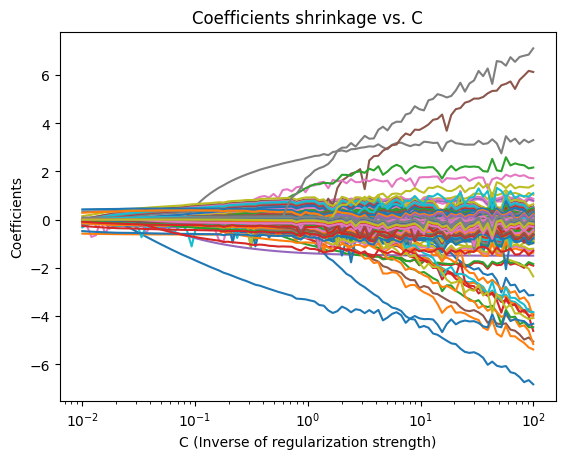

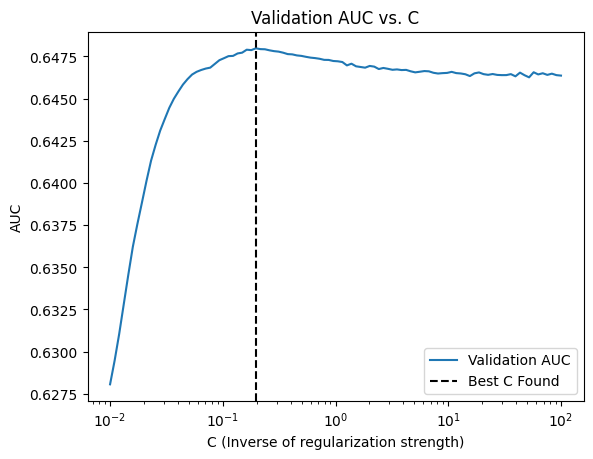

In [ ]:
# Executing the function defined above to identify the optimal shrinkage coefficient (best_c)
#and select the most relevant features for our Logistic Regression model using L1 regularization.

best_c, selected_features = plot_logistic_regression_with_l1(X_train, y_train, X_validation, y_validation)

* The first graph shows how the coefficients of the model shrink as the value of C changes. This helps visualize the effect of regularization strength on the model's coefficients.
* The second graph displays the AUC score against different values of C, helping us identify the shrinkage coefficient that yields the best model performance on the validation set.

Using our function above, we have identified the optimal regularization strength (best C value) and selected the most relevant features for our Logistic Regression model using L1 regularization. The code below will display the best C value that we've determined and list the features that were selected as being most influential in the model.

In [ ]:
print("Best C:", best_c)
print("Selected features:", selected_features)

Best C: 0.19630406500402714
Selected features: ['ANNUAL_KM' 'VEHICLE_VALUE' 'YEARS_LICENSED'
 'CONVICTION_COUNT_MINOR_3YRS' 'CONVICTION_COUNT_MAJOR_3YRS'
 'CONVICTION_COUNT_CRIMINAL_3YRS' 'ASSIGNED_LOSSES_PD_5YRS'
 'VEHICLEYEAR_1990' 'VEHICLEYEAR_1995' 'VEHICLEYEAR_1996'
 'VEHICLEYEAR_1999' 'VEHICLEYEAR_2001' 'VEHICLEYEAR_2002'
 'VEHICLEYEAR_2003' 'VEHICLEYEAR_2004' 'VEHICLEYEAR_2005'
 'VEHICLEYEAR_2007' 'VEHICLEYEAR_2008' 'VEHICLEYEAR_2009'
 'VEHICLEYEAR_2010' 'VEHICLEYEAR_2011' 'VEHICLEYEAR_2012'
 'VEHICLEYEAR_2013' 'VEHICLEYEAR_2014' 'VEHICLEYEAR_2015'
 'VEHICLEYEAR_2016' 'VEHICLEYEAR_2017' 'VEHICLEMAKE_AUDI'
 'VEHICLEMAKE_BMW' 'VEHICLEMAKE_BUICK' 'VEHICLEMAKE_CHEVROLET'
 'VEHICLEMAKE_DODGE' 'VEHICLEMAKE_FORD' 'VEHICLEMAKE_HONDA'
 'VEHICLEMAKE_HYUNDAI' 'VEHICLEMAKE_INFINITI' 'VEHICLEMAKE_KIA'
 'VEHICLEMAKE_MAZDA' 'VEHICLEMAKE_MINI' 'VEHICLEMAKE_MITSUBISHI'
 'VEHICLEMAKE_NISSAN' 'VEHICLEMAKE_OLDSMOBILE' 'VEHICLEMAKE_OUTLIER'
 'VEHICLEMAKE_PONTIAC' 'VEHICLEMAKE_PORSCHE' 'VEHICLEMAKE_S

In [ ]:
len(selected_features)

174

The results show that the best value for the regularization coefficient (C) in our model is around 0.196. This is the value that gives us the best balance in our predictions. The list of selected features shows which features are most important for our model, helping to focus on the most relevant information and avoid using unnecessary or less important data.Using L1 regularization we have reduced the number of features from 299 to 174. These are the features we will use for training our model.

# **MODEL TRAINING**

## LOGISTIC REGRESSION

Now that we've identified the best features, our next step is to train our Logistic Regression Model using these selected features and then make predictions on the Test Data. But, before diving into the model training, it's worthwhile to understand what Logistic Regression is and how it functions.

**Logistic Regression**, despite its name, is actually a classification method, not a regression method. It's used primarily for binary classification problems where the outcomes are in two classes, like 0s and 1s in our case. The core idea of Logistic Regression is to find a relationship between features and the probability of a particular outcome.

The core of Logistic regression lies in its use of the sigmoid function, which is defined as:

$$f(x) = \frac{1}{1 + e^{-x}}$$

This function takes any real-valued number and maps it to a value between 0 and 1. This characteristic makes it perfect for transforming our linear equation's output into probabilities. Essentially, the sigmoid function takes the input (which is the combination of our features and their coefficients) and outputs a probability score that falls between 0 and 1. If the score is above a certain threshold, usually 0.5, we classify the outcome as 1, and if it's below, we classify it as 0.

The Sigmoid function has a very significant role in Logistic Regression. It's what allows us to go from linear regression, which predicts a continuous output, to a model that can predict probabilities for binary classification. This makes Logistic Regression useful in scenarios like ours, where we need to categorize data into one of two groups based on a set of features.


Now lets proceed to Model Training. Since we selected the most important features using L1 regularization, we will be using only those features to train our model. Here, we select those features only.

In [ ]:
X_train_select = X_train[selected_features]  # Training data with selected features

X_validation_select = X_validation[selected_features]

### Training the Logistic Regression Model

Before we begin training our model, it is important to note that the model needs to be tuned properly for it to make proper predictions, one main reason being that we have an imbalanced dataset as we have established before (too many 0s and few 1s in our response variable). To tackle this,the idea is to strategically adjust class weights and experiment with decision thresholds. These steps are key: adjusting class weights helps ensure our model doesn't miss the crucial but less common cases, while tweaking decision thresholds is about finding that sweet spot where our model's predictions bring in the most revenue.For this we iterate over a range of class weights and threshold values. \\
But how do we determine what's the best value? \\

**Here's the idea :** \\

Since we are predicting whether or not the customer will buy insurance from Cooperators Insurance, \\

Every time we predict that someone will buy the insurance (i.e., we predict IsBound = 1), the Cooperators will pay ```$1.00``` to send ads to that user, such as ads on Google. Additionally, if someone we've predicted to buy insurance actually does (i.e., we predicted IsBound = 1 and the true value is IsBound = 1), the Cooperators will gain ```$5.50``` in Revenue.

To calculate the total money made from this advertising, we can use the formula: ```Revenue = $5.50 * (Number of True Positives) - $1.00 * (Number of total 1's we predicted)```. Our goal is to maximize this amount.

Implementing this formula to generate revenue in our code below, we determine the optimal class weights and threshold values that maximize this revenue. Then, we fit a logistic regression model using these optimal values of the parameters.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import numpy as np

# Define a range for class weights and thresholds
class_weight_options = [{0: 1, 1: w} for w in np.linspace(2, 5, 10)]
threshold_options = np.linspace(0.1, 0.9, 10)

# Best parameters initialization
best_revenue = -np.inf
best_class_weight = None
best_threshold = None

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Iterate over each combination of class weights and thresholds
for class_weight in class_weight_options:
    for threshold in threshold_options:
        revenues = []

        # Cross-validation
        for train_index, val_index in skf.split(X_train_select, y_train):
            # Use .iloc to select rows based on integer indices
            X_train_fold, X_val_fold = X_train_select.iloc[train_index], X_train_select.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
            # Train the model
            model = LogisticRegression(C=best_c, class_weight=class_weight, solver='liblinear', max_iter=10000)
            model.fit(X_train_fold, y_train_fold)

            # Predict probabilities and apply threshold
            y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
            y_pred = (y_pred_proba >= threshold).astype(int)

            # Calculate revenue
            TN, FP, FN, TP = confusion_matrix(y_val_fold, y_pred).ravel()
            revenue = 5.50 * TP - 1 * (TP + FP)
            revenues.append(revenue)

        # Calculate average revenue for this combination
        avg_revenue = np.mean(revenues)

        # Update best parameters if current combination is better
        if avg_revenue > best_revenue:
            best_revenue = avg_revenue
            best_class_weight = class_weight
            best_threshold = threshold
            model_1 = model
# Print the best parameters and revenue
print(f'Best Class Weight: {best_class_weight}')
print(f'Best Threshold: {best_threshold}')
print(f'Best Average Revenue: {best_revenue}')
print(f'model_1 has been fitted with the best extracted parameters.')

Best Class Weight: {0: 1, 1: 3.6666666666666665}
Best Threshold: 0.4555555555555556
Best Average Revenue: 4501.6
model_1 has been fitted with the best extracted parameters.


### Evaluating the Performace of our Logistic Regression Model

Finally we have our first model. Using the best parameters, the above code has saved the best model as model_1. Now lets use this model to make predictions on the validation set and evaluate its performance.

In [ ]:
# selecting the important features on validation set (essentially the features that the model was trained upon)
X_validation_select = X_validation[selected_features]

# Predicting the probabilities
y_pred_prob = model_1.predict_proba(X_validation_select)[:, 1]

# Making Predictions with the best threshold
y_pred_1 = (y_pred_prob >= best_threshold).astype(int)

# Generating a new confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred_1)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculating Accuracy, Precision, Recall, and F1 Score with the new threshold
accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Calculating ROC-AUC
auc = roc_auc_score(y_validation, y_pred_1)

# # Print the results
print(f'Accuracy on validation set (custom threshold): {accuracy}')
print(f'Precision (custom threshold): {precision}')
print(f'Recall (custom threshold): {recall}')
print(f'F1-score (custom threshold): {f1_score}')
print(f'AUC on validation set: {auc}')


Accuracy on validation set (custom threshold): 51.639076097624816
Precision (custom threshold): 0.2770481894609594
Recall (custom threshold): 0.7562621868906555
F1-score (custom threshold): 0.4055336604198504
AUC on validation set: 0.6028685301581609


With the threshold adjusted at around 0.456, and the model achieved an accuracy of approximately 51.64%. However, it's important to note that accuracy alone might not give us the full picture, given the class imbalance in the dataset. Furthermore, we examined precision and recall. Precision, which indicates how accurate our positive predictions are, was found to be roughly 0.277. This indicates the model's ability to make some accurate positive predictions . On the other hand, recall, which measures the model's ability to capture actual positive cases, is notably high at about 0.756. This indicates that the model is effective in identifying individuals who are likely to buy insurance. The F1-score, a combination of precision and recall, is around 0.406, indicating a balance between the two. Additionally, the ROC-AUC score, approximately 0.603, highlights the model's ability to distinguish between potential insurance buyers and non-buyers. In summary, our model shows promise, especially in identifying potential buyers, but there's room for improvement, considering the class imbalance.

Now, we will plot the ROC Curve to visualise the Area Under the Curve:

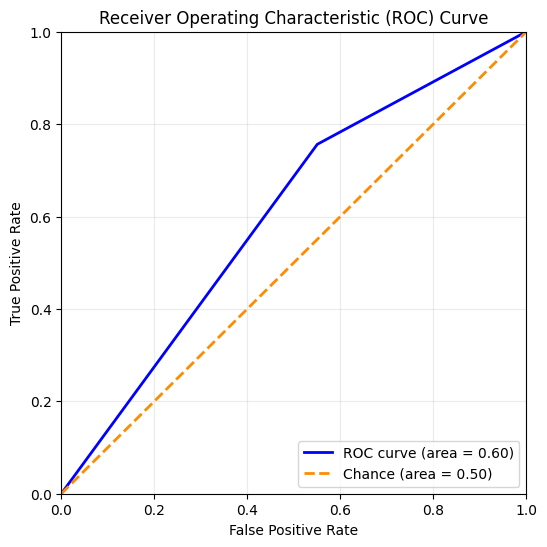

In [ ]:
# Calculating ROC curve
FPR, TPR, thresholds = roc_curve(y_validation, y_pred_1)

# Calculate AUC (Area under the ROC Curve )
auc = roc_auc_score(y_validation, y_pred_1)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(FPR, TPR, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--', label='Chance (area = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.25)
plt.show()

## FINAL LOGISTIC REGRESSION MODEL

### Retraining the Logistic Regression Model on Full Training Data

After training the Logistic regression model on 70% training data and evaluating it on the validation set, we now proceed to train the model on full training data to get our final Logistic regression model. \\
It is important to note that, since there exists a class imbalance in our dataset, the class weights might need to be adjusted to get similar accuracy on the unseen test data after we train the model on full training data. So we use a manual definition of class weights which can be adjusted to make better predictions if necessary.

In [ ]:
# Define class weights
class_weights = {
    0: 1,
    1: 3.7 # Higher weight to the minority class (the optimal class weight for minority class given by our model earlier was 3.6666666666666665
}                                                   # Using 3.7 here gave us the best results , indicating that was estimate was on point)


# Initialize the logistic regression model with class weights
model_2 = LogisticRegression(C=best_c, class_weight=class_weights, solver='liblinear', max_iter=10000)

# Fit the model using full data with the selected features
X_select = X[selected_features] # Training data with selected features
model_2.fit(X_select, y)

LogisticRegression(C=0.19630406500402714, class_weight={0: 1, 1: 3.7},
                   max_iter=10000, solver='liblinear')

### Predicting the Results on Unseen Test Data

Now we use the final model to predict the IS_BOUND values on unseen test data

In [ ]:
# Use only the selected features for prediction
data_test_realigned = data_test.reindex(columns=selected_features, fill_value=0)

# Predict using our pre-trained model in the previous step
# X_test_important = data_test[important_features]
y_test_pred = model_1.predict(data_test_realigned)

# Predict the Probabilities values from the Model
y_test_pred_prob = model_1.predict_proba(data_test_realigned)[:, 1]

# Use the Threshold value determined above to classify the Labels
y_test_pred_custom = (y_test_pred_prob >= 0.47).astype(int)

# Convert the predictions array to a list and join with commas
predicted_values = ', '.join(map(str, y_test_pred_custom.tolist()))

# Print the comma-separated list of predicted IS_BOUND values
print(predicted_values)

0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0

From above predictions, our models scores on the leaderboard are as follows :
*	Accuracy : 52
*	False Positive Rate : 29
*	False Negative Rate : 51
* Revenue Generated in cents per person : 16       

## LDA MODEL WITH PCA
**COMBINATION OF PRINCIPAL COMPONENT ANALYSIS AND LINEAR DISCRIMINANT ANALYSIS**



After succesfully training a Logistic Regression model and getting some true predictions from the model, we move on to a Bayesian model for prediction. A Bayesian model in statistics is an approach that combines existing information (prior probabilities) with new data to calculate updated probabilities, allowing for more accurate predictions. \\
 Here we have used a combination of PCA and LDA which is passed through a sigmoid function to make predictions. Lets understand this approach in more detail. \\

First we employ PCA on our selected features. \\

**PCA (Principal Component Analysis**) is a technique that reduces the dimensionality of our data. It does this by finding the principal components, which are essentially combinations of the original features. These components are chosen to maximize the variance in the data. In simpler terms, PCA identifies the most important aspects of our data and simplifies it by creating new features that capture those essential elements.

Then LDA comes into play \\

**LDA (Linear Discriminant Analysis)** is a statistical method that focuses on classification. It considers the differences between classes in our data. For example, it looks at how different groups of customers (those who bought insurance and those who didn't) are distinct from each other based on statistical measures like means and variances. LDA then calculates a linear combination of features that best separates these groups. LDA uses Bayesian principles, which involve probabilities. It's like LDA is constantly updating its understanding of customer behavior based on the data it sees. This allows it to assign probabilities to customers falling into the "buy insurance" or "don't buy insurance" categories. These probabilities are essential for making predictions because they indicate how likely a customer is to make a purchase.\\

Then we pass the outputs from LDA through a sigmoid function. \\

**Sigmoid Function** as discussed in the logistic regression model section, is a mathematical formula that transforms the output of our LDA analysis into probabilities. It takes the linear output from LDA and maps it into a range between 0 and 1. This is crucial because it allows us to interpret the result as a probability. For example, a result of 0.7 means there's a 70% chance a customer will buy insurance.

So, in summary, PCA simplifies data by finding the most important aspects, LDA focuses on classifying data based on statistical differences, and the sigmoid function turns LDA's output into understandable probabilities. These techniques help us predict whether or not a customer will buy insurance.







### Training the Model

In the following section, we implement PCA, LDA and the sigmoid function as discussed above. \\
We are only using the features that were selected by L1 regularization in our feature selection section for our PCA as using all the features was adding too much noise and the model was performing worse - only giving us a revenue of 13 cents per person. \\

In this section also, like before we are determining the optimal parameters (decision threshold) the optimal number of PCA components based percentage of variance explained by running a loop to maximize the revenue.

In [ ]:
# Import the Libraries that would help us solve for PCA, LDA from sklearn and also Scale the Features using Standard Scaler. We will also use tqdm to track our iterations.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from tqdm import tqdm
import numpy as np

# We are defining a function that would return a output from the sigmoid function to scale our Label Prediction Values between 0 and 1
def sig(x):
 return 1/(1 + np.exp(-x))

# X_select is already defined that contains the selected features from data_train
# y is already defined that has our response variable
y = data_train['IS_BOUND']
X_train = data_train[selected_features]
X_test = data_test[selected_features]


# Scaling the Features to bring the variance of all features in the same scale before performing PCA. This is a crucial step while performing the PCA
# As, features with larger values such as ANNUAL_KM which ranges from 0 to 50K, will have much higher variance than one-hot encoded categorical features
# ranging from 0 to 1.

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

# PCA and Sigmoid Threshold value grid space. For PCA, the Grid Space is from 0 to 1, this grid defines how much percentage of Variance do we need to explain
# using our PCA model, and basis the defined input percentage, the model will output the top set of Components that describe atleast that much variance.
# We will iterate over this percentage grid and find out that after using n-Components, for which value of 'n' do we maximise the Revenue on Training Data itself.
pca_vals = np.linspace(0.999999,0.9,1)

# We are defining a Threshold Grid Space, the will range from 0 to 1 in 50 steps and it will be used to split the Labels on the Label Prediction Values once
# it is passed through the Sigmoid function.
thres = np.linspace(0.456,0.458,100)

# Storing the metrics for the percentage of explained variance that maximised the Revenue
best_pca = -1

# Storing the best performing Threshold to Classify the Labels.
best_thres = -1

# Tracking the Maximimum Revenue, lowest False Positive and False Negative Rate over the Grid Space.
best_rev = 32000
best_fp_rate = 1
best_fn_rate = 1
best_fn = -1
best_fp = -1
best_tp = -1
best_tn = -1

# Iterating on the grid space to maximise revenue
for pca_value in pca_vals:

  # PERFORMING PCA by defining an instance and asking it to define percentage of variance defined by the pca_value
  pca = PCA()

  # Fit the Training Data and Transform it for PCA
  X_train_pca_transformed = pca.fit_transform(X_train_scaled)
  # print("Variance ratio of components:\n",pca.explained_variance_ratio_)

  # Once we have the principal components from the PCA, we will PERFORM LDA to generate ONE Discriminant that can separate both the Classes
  lda = LDA(n_components=1)

  # Fit the Components and Transform the Features
  # lda.fit(X_train_pca_transformed, y)
  X_train_LDA = lda.fit_transform(X_train_pca_transformed,y)

  # Once the Discriminant is generated in the above step, feed each value in a Sigmoid and store the Sigmoid Output of the Discriminant
  X_train_sig = [sig(i) for i in X_train_LDA]

  # Store the LDA discriminant values in a df
  train_temp = []
  for i in range(len(X_train_scaled)):
    train_temp.append([X_train_sig[i][0],y.values[i]])
  train_temp = pd.DataFrame(train_temp)

  # Iterate over every threshold grid value and see where we are maximising Revenue on the Training Data
  for i in thres:
    # Classify the Classes using each Threshold and capture the metrics to plot the Confusion Matrix
    train_temp[2] = np.where(train_temp[0].values>i,1,0)
    train_temp2 = train_temp[[0,1,2]].groupby(by=[1,2],as_index=False).count()

    try:
      TP = train_temp2[(train_temp2[1]==1)&(train_temp2[2]==1)][0].values[0]
    except:
      TP = 0

    try:
      TN = train_temp2[(train_temp2[1]==0)&(train_temp2[2]==0)][0].values[0]
    except:
      TN = 0

    try:
      FP = train_temp2[(train_temp2[1]==0)&(train_temp2[2]==1)][0].values[0]
    except:
      FP = 0

    try:
      FN = train_temp2[(train_temp2[1]==1)&(train_temp2[2]==0)][0].values[0]
    except:
      FN = 0

    fn_rate = FN/(FN+TN) if (FN+TN) != 0 else 0
    fp_rate = FP/(FP+TP) if (FP+TP) != 0 else 0

    # Calculate the Revenue
    revenue = (4.5*TP)-FP

    # Maximising on Revenue keeping false negative rate more than 5% and false positive rate atleast 5% to remove all zeros and all ones in our predictions
    if (revenue >= best_rev) & (fn_rate > 0.05) & (fp_rate < 0.95):
      best_rev = revenue
      best_pca = pca_value
      best_thres = i
      best_fp_rate = fp_rate
      best_fn_rate = fn_rate
      best_fn = FN
      best_fp = FP
      best_tp = TP
      best_tn = TN
      print(f'best_rev: {"{:.0f}".format(best_rev)}, pca: {"{:.2f}".format(best_pca)}, thres: {"{:.4f}".format(best_thres)}, fp: {"{:.2f}".format(best_fp_rate)}, fn: {"{:.2f}".format(best_fn_rate)})', end='\n')


best_rev: 32701, pca: 1.00, thres: 0.4560, fp: 0.72, fn: 0.13)
best_rev: 32703, pca: 1.00, thres: 0.4560, fp: 0.72, fn: 0.13)
best_rev: 32708, pca: 1.00, thres: 0.4560, fp: 0.72, fn: 0.13)
best_rev: 32712, pca: 1.00, thres: 0.4561, fp: 0.72, fn: 0.13)
best_rev: 32714, pca: 1.00, thres: 0.4561, fp: 0.72, fn: 0.13)
best_rev: 32714, pca: 1.00, thres: 0.4566, fp: 0.72, fn: 0.13)
best_rev: 32718, pca: 1.00, thres: 0.4567, fp: 0.72, fn: 0.13)
best_rev: 32720, pca: 1.00, thres: 0.4567, fp: 0.72, fn: 0.13)
best_rev: 32720, pca: 1.00, thres: 0.4568, fp: 0.72, fn: 0.13)
best_rev: 32724, pca: 1.00, thres: 0.4568, fp: 0.72, fn: 0.13)
best_rev: 32728, pca: 1.00, thres: 0.4569, fp: 0.72, fn: 0.13)
best_rev: 32728, pca: 1.00, thres: 0.4569, fp: 0.72, fn: 0.13)
best_rev: 32728, pca: 1.00, thres: 0.4572, fp: 0.72, fn: 0.13)


In [ ]:
best_thres

0.4575454545454546

In this model, our goal is to maximize revenue. We do this by exploring different Sigmoid threshold values that classify the outcomes after obtaining the discriminant from LDA. Additionally, we adjust the number of PCA components to capture the desired amount of variance from the training data. After identifying the optimal combination of PCA components and Sigmoid threshold that maximizes revenue, we will apply these parameters to train our final model.





### Evaluating the Model using ROC

In this section, we evaluate the model's performance using ROC curve. The metrics used are generated from the code above using the best parameters.

In [ ]:
# Recalculate Accuracy, Precision, Recall, and F1 Score with the new values
accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Calculating ROC-AUC
auc = roc_auc_score(y, X_train_sig)

# # Print the results
print(f'Optimal Threshold: {best_thres}')
print(f'Accuracy on validation set (custom threshold): {accuracy}')
print(f'Precision (custom threshold): {precision}')
print(f'Recall (custom threshold): {recall}')
print(f'F1-score (custom threshold): {f1_score}')
print(f'AUC on validation set: {auc}')

Optimal Threshold: 0.4575454545454546
Accuracy on validation set (custom threshold): 53.78560351765699
Precision (custom threshold): 0.2851051290495918
Recall (custom threshold): 0.7378762729352654
F1-score (custom threshold): 0.4112925408216849
AUC on validation set: 0.6552338726353913


With the Sigmoid threshold at around 0.4575 and using all the Components generated by PCA, which was trained only on the best features we had discovered to train our model, and the model achieved an accuracy of approximately 53.78% but similiar to Logistic Classification Model, given the class imbalance in the dataset it would not be the best metric to measure performance of the model, but we can observe that the accuracy is similiar to that from the Logistic Model was trained earlier.

Close to the results obtained from the Logistic Model, we are getting the precision of 28.5% , recall of 73.8% , F1-Score of 41.1% and AUC of 0.655.

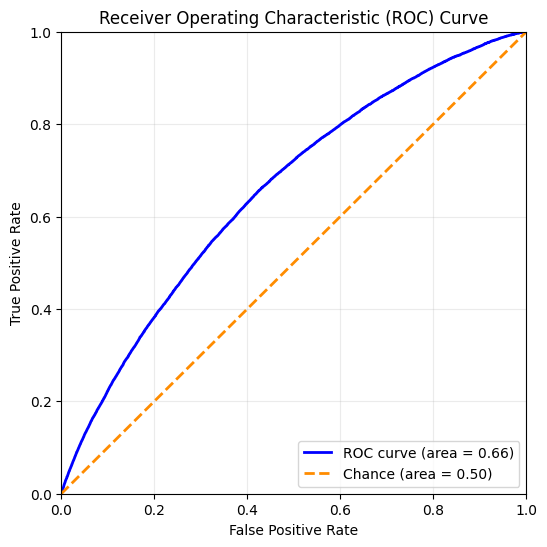

In [ ]:
# Calculating ROC curve
FPR, TPR, thresholds = roc_curve(y, X_train_sig)

# Calculate AUC (Area under the ROC Curve )
auc = roc_auc_score(y,  X_train_sig)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(FPR, TPR, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--', label='Chance (area = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.25)
plt.show()

## FINAL LDA MODEL TRAINING AND TEST PREDICTIONS
**Training the Final Model and Predicting the results on Test Data based on the best parameters**

Now, we train our final model and make predictions on the Test Data

In [ ]:
# Load the Training Data and Test Data
X_train = data_train[selected_features]
X_test = data_test[selected_features]
y_train = data_train['IS_BOUND']

# Fitting the scaler on Training Data and scaling the Train and Test Datasets
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA Model with 100% explained variance, by using all the components generated
pca = PCA()
X_train_pca_transformed = pca.fit_transform(X_train_scaled)
X_test_pca_transformed = pca.transform(X_test_scaled)

# LDA Model to generate the discriminants
lda = LDA(n_components=1)

# Fit the Training Data
lda.fit(X_train_pca_transformed, y_train)

# Transform the Discriminant on the Test Data
X_test_LDA = lda.transform(X_test_pca_transformed)

# Assuming sig is a properly defined sigmoid function
X_test_sig = sig(X_test_LDA)

# Store the Sigmoid Values
prediction_dataset = pd.DataFrame(X_test_sig)

# Predict the Classes using the best threshold discovered in the previous step
prediction_dataset['predicted_class'] = np.where(prediction_dataset[0] > best_thres, 1, 0)

print(', '.join(map(str, prediction_dataset['predicted_class'].tolist())))


1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0

From above predictions, our model's scores on the leaderboard are as follows :
*	Accuracy : 51
*	False Positive Rate : 28
*	False Negative Rate : 52
* Revenue Generated in cents per person : 15



# MODEL COMPARISON BASED ON ROC CURVES

## Plotting the ROC Curves

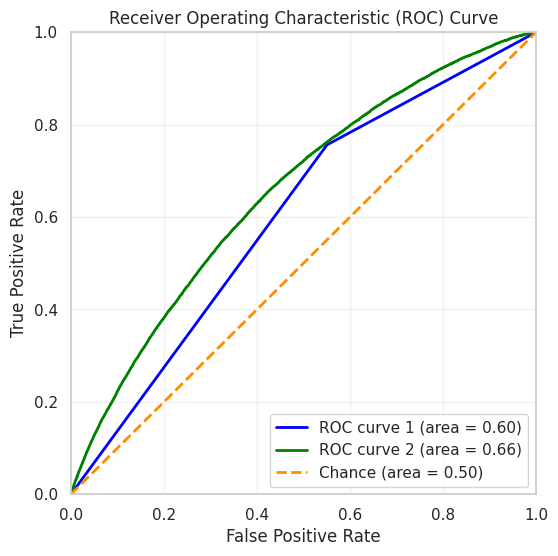

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculating ROC curve for the first classifier
FPR1, TPR1, thresholds1 = roc_curve(y_validation, y_pred_1)
auc1 = roc_auc_score(y_validation, y_pred_1)

# Calculating ROC curve for the second classifier
FPR2, TPR2, thresholds2 = roc_curve(y, X_train_sig)
auc2 = roc_auc_score(y, X_train_sig)

def plot_roc_curves(fpr1, tpr1, auc1, fpr2, tpr2, auc2):
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve for the first classifier
    plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve 1 (area = {auc1:.2f})')

    # Plot the ROC curve for the second classifier
    plt.plot(fpr2, tpr2, color='green', lw=2, label=f'ROC curve 2 (area = {auc2:.2f})')

    # Plot the diagonal line for the second classifier
    plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--', label='Chance (area = 0.50)')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.25)
    plt.show()

plot_roc_curves(FPR1, TPR1, auc1, FPR2, TPR2, auc2)

* ROC curve 1 : ROC Curve for Logistic Regression Model
* ROC curve 2 : ROC Curve for PCA + LDA Model

## Comparative Analysis and Final Comments

The ROC curves for our two models are essentially a graphical representation of their performance in predicting a certain event, with each curve showing how well a model can differentiate between two possible outcomes. The first model, which uses Logistic Regression, has a ROC curve that suggests it is not quite as good at distinguishing between the outcomes compared to the second model, which combines PCA and LDA techniques. This is what we can infer from the area under the curve (AUC), where a higher AUC generally indicates a better performing model. The PCA + LDA model, with its higher AUC of 0.66, presents a smoother, more consistent curve, steadily ascending towards the top-left corner, reflecting its stable performance across various thresholds.

However, when we look at the financial impact, the Logistic Regression model actually brings in more revenue. This seems counterintuitive, given its lower AUC of 0.60. The reason lies in how these models predict true positive outcomes, which in our case are significantly more valuable. The Logistic Regression model, despite its lower AUC, finds a better balance between correctly predicting true outcomes and avoiding false positives at the specific
threshold, which is what matters for higher revenue generation. In simpler terms, it's not just about how often the model is right, but about how valuable those correct predictions are. The shapes of the ROC curves give us clues about this balance: while the PCA + LDA model's curve shows it's generally more accurate, the Logistic Regression's curve shows that at the right spot, it's more profitable. The peak in the Logistic Regression ROC curve represents the most effective trade-off between the true positive rate and the false positive rate achieved by the model for a particular threshold. In simple terms, at this peak point, the number of correct predictions that add value (true positives) is maximized relative to the number of incorrect predictions that cost money (false positives). This shows us that even if a model isn't the best in every way (based on pre-defined evaluation metrics), it can still be the more useful for what a business actually needs, like picking out the right customers that will consequently generate more revenue.